In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse

In [2]:
netflix_dataset = pd.read_csv("netflix.csv")

In [3]:

nd = netflix_dataset.copy(deep = True)
nd.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


list of unique columns

In [4]:
nd.columns.unique()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

dataset have some null values

In [5]:
nd.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
cast_df =nd[["title","cast"]]
cast_df.head()

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Jailbirds New Orleans,NaN
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


unnesting all the column and creating separate lines and explode all the unnested columns

In [7]:
cast_df["cast"] = cast_df["cast"].apply(lambda x: str(x).split(", "))

cast_df.head()

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_1168\3633183145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_df["cast"] = cast_df["cast"].apply(lambda x: str(x).split(", "))


,title,cast
0,Dick Johnson Is Dead,[nan]
1,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
3,Jailbirds New Orleans,[nan]
4,Kota Factory,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."


In [8]:
cast_df = cast_df.explode("cast")
cast_df.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba


In [9]:
list_df = nd[["title", "listed_in"]]
list_df["listed_in"] = list_df["listed_in"].apply(lambda x : str(x).split(", "))
list_df = list_df.explode("listed_in")
list_df.head()


C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_1168\2767703993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df["listed_in"] = list_df["listed_in"].apply(lambda x : str(x).split(", "))


,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows


In [10]:
country_df = nd[["title","country"]]
country_df["country"] =  country_df["country"].apply(lambda x : str(x).split(", "))
country_df = country_df.explode("country")
country_df.head()

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_1168\1173849806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df["country"] =  country_df["country"].apply(lambda x : str(x).split(", "))


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [11]:
dir_df = nd[["title", "director"]]
dir_df["director"] = dir_df["director"].apply(lambda x : str(x).split(", "))
dir_df = dir_df.explode("director")
dir_df.head()

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_1168\4045677070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_df["director"] = dir_df["director"].apply(lambda x : str(x).split(", "))


,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


merge all the unnested dataset we processed before

In [12]:
merge_df = pd.merge(left = cast_df , right = list_df, on = ["title"], how = "inner")
merge_df.head()

,title,cast,listed_in
0,Dick Johnson Is Dead,nan,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows


In [13]:
merge_df1 = pd.merge(left = merge_df , right = country_df, on = "title")
merge_df1.head()

,title,cast,listed_in,country
0,Dick Johnson Is Dead,nan,Documentaries,United States
1,Blood & Water,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,International TV Shows,South Africa


In [14]:
merge_df2 = pd.merge(left = dir_df, right = merge_df1 , on= "title")
merge_df2.head()

,title,director,cast,listed_in,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa


renaming the requried columns

In [15]:
merge_df2.rename(columns = { "director" : "Directors",
                      "cast" : "Actors",
                      "listed_in" : "Genre",
                      "country" :  "Countrys"}, inplace = True)
merge_df2.head()


,title,Directors,Actors,Genre,Countrys
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa


merging the unnested dataset with original dataset

In [16]:
nd1 = merge_df2.merge(nd[["show_id", "type", "title","date_added",'rating',"duration", "release_year", "description" ]]  ,  on = "title", how = "left")
nd1.head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",PG-13,90 min,2020,"As her father nears the end of his life, filmm..."
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."


after unnesting and processed data. now null data are reduced

In [17]:
nd1.isnull().sum()

title             0
Directors         0
Actors            0
Genre             0
Countrys          0
show_id           0
type              0
date_added      158
rating           67
duration          3
release_year      0
description       0
dtype: int64

after mergeing the dataset the length of the dataset.

In [18]:
len(nd1)

201991

In [19]:
merge_df1.groupby(["country","cast"])["title"].nunique().sort_values(ascending =  False)

country         cast                    
United States   nan                         406
nan             nan                         154
United Kingdom  nan                          96
India           Anupam Kher                  40
                nan                          39
                                           ... 
Japan           Hikaru Yuki                   1
                Hilary Haag                   1
                Hilary Shepard                1
                Hinaki Yano                   1
nan             Łukasz "Lotek” Lodkowski      1
Name: title, Length: 54892, dtype: int64

checking column type

In [20]:
type(nd1.Actors)

pandas.core.series.Series

In [21]:
nd1.groupby(["Countrys"]).agg({"title": "nunique"})

,title
Countrys,
,2
Afghanistan,1
Albania,1
Algeria,3
Angola,1
...,...
Venezuela,4
Vietnam,7
West Germany,5


checking the dataset all columns types

In [22]:
nd1.dtypes

title           object
Directors       object
Actors          object
Genre           object
Countrys        object
show_id         object
type            object
date_added      object
rating          object
duration        object
release_year     int64
description     object
dtype: object

In [23]:
nd1["Countrys"].value_counts()

Countrys
United States     59349
India             22814
United Kingdom    12945
nan               11897
Japan              8679
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: count, Length: 128, dtype: int64

In [24]:
nd1['Actors'].replace(["nan"],["Unknown Actors"],inplace=True)
nd1["Directors"].replace(["nan"],["Unknown Directors"],inplace = True)
nd1["Countrys"].replace(["nan"],[np.nan], inplace = True)

In [25]:
nd1["Countrys"].isnull().sum()

11897

In [26]:
nd1.isnull().sum()

title               0
Directors           0
Actors              0
Genre               0
Countrys        11897
show_id             0
type                0
date_added        158
rating             67
duration            3
release_year        0
description         0
dtype: int64

In [27]:
nd1.dtypes

title           object
Directors       object
Actors          object
Genre           object
Countrys        object
show_id         object
type            object
date_added      object
rating          object
duration        object
release_year     int64
description     object
dtype: object

In [28]:
nd1[["type","title","rating"]] = nd1[["type","title","rating"]].astype("category")
nd1.dtypes

title           category
Directors         object
Actors            object
Genre             object
Countrys          object
show_id           object
type            category
date_added        object
rating          category
duration          object
release_year       int64
description       object
dtype: object

original dataset length

In [29]:
len(netflix_dataset)

8807

processed dataset length

In [30]:
len(nd1)

201991

In [31]:
# reset the index in unique and ascending order.
nd1 = pd.DataFrame(nd1.reset_index(drop = True))
nd1.head(5)

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",PG-13,90 min,2020,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."


unique value of each columns in the dataset

In [32]:
for i in nd1.columns:
    print(i ,":", nd1[i].nunique())

title : 8807
Directors : 4994
Actors : 36440
Genre : 42
Countrys : 127
show_id : 8807
type : 2
date_added : 1767
rating : 17
duration : 220
release_year : 74
description : 8775


checking rating column unique values count.

In [33]:
nd1["rating"].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

rating column have rating in mins.so we gonna shift that to corresponding duration columns.

In [34]:
nd1.loc[nd1["duration"].isnull(),"duration"] =nd1.loc[nd1["duration"].isnull(),"duration"].fillna(nd1["rating"])
nd1.loc[nd1["rating"].str.contains("min", na=False ),"rating"] = 'NR'
nd1["rating"].fillna("NR", inplace = True)
pd.set_option("display.max_rows",None)

In [35]:
nd1["rating"].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1643
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          0
84 min          0
66 min          0
Name: count, dtype: int64

In [36]:
nd1["date_added"].isnull().sum()

158

In [37]:
BEF_MOD = nd1["date_added"].value_counts().sort_values(ascending = False)
BEF_MOD.head()

date_added
January 1, 2020      3730
November 1, 2019     2229
July 1, 2021         2219
October 1, 2017      1899
September 1, 2021    1756
Name: count, dtype: int64

fill missing `date_added` using `release_year`

In [38]:
for i in nd1[nd1["date_added"].isnull()]["release_year"].unique():
    imp = nd1[nd1['release_year']==i]['date_added'].mode().values[0]
    nd1.loc[nd1['release_year']==i,'date_added'] = nd1.loc[nd1['release_year']==i,'date_added'].fillna(imp)


In [39]:
AFT_MOD = nd1["date_added"].value_counts().sort_values(ascending = False)
AFT_MOD.head()

date_added
January 1, 2020      3730
November 1, 2019     2229
July 1, 2021         2220
October 1, 2017      1899
September 1, 2021    1780
Name: count, dtype: int64

In [40]:
nd1["date_added"].isnull().sum()

0

In [41]:
nd1['date_added'].mode()

0    January 1, 2020
Name: date_added, dtype: object

In [42]:
nd1.isnull().sum()

title               0
Directors           0
Actors              0
Genre               0
Countrys        11897
show_id             0
type                0
date_added          0
rating              0
duration            0
release_year        0
description         0
dtype: int64

In [43]:
nd1["Countrys"].value_counts()

Countrys
United States           59349
India                   22814
United Kingdom          12945
Japan                    8679
France                   8254
Canada                   7915
Spain                    5315
South Korea              5043
Germany                  4383
Mexico                   3941
China                    3317
Turkey                   2714
Australia                2616
Nigeria                  2451
Hong Kong                2355
Egypt                    2318
Indonesia                2126
Taiwan                   2102
Belgium                  2052
Thailand                 1935
Philippines              1888
Brazil                   1829
Argentina                1804
Italy                    1667
Colombia                 1552
South Africa             1339
Ireland                  1071
Poland                    991
Denmark                   953
Sweden                    908
Netherlands               820
United Arab Emirates      736
Singapore                 723
L

all the places where corresponding country is missing for a director
suppose there's a null for country
#when we have a director whose other movies have a country given.So below piece of code just checks the mod.f


In [44]:
for i in nd1[nd1['Countrys'].isnull()]['Directors'].unique():
    if i in nd1[~nd1['Countrys'].isnull()]['Directors'].unique():
        imp=nd1[nd1['Directors']==i]['Countrys'].mode().values[0]
        nd1.loc[nd1['Directors']==i,'Countrys']=nd1.loc[nd1['Directors']==i,'Countrys'].fillna(imp)


In [45]:
nd1.groupby(["Countrys"]).agg({"title": "nunique"})

,title
Countrys,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,1
Argentina,91
Armenia,1
Australia,160
Austria,12


So we imputed the country column on the basis of directors whose other movie titles had countries given. But there might be directors who have only one occurence in our data. In that scenario, I have used Actors as a basis.
i.e- for this Actor majorly acts in movies of which country? 
Imputation has been done on this basis. For remaining rows, country has been filled as Unknown Country

In [46]:
for i in nd1[nd1["Countrys"].isnull()]["Actors"].unique():
    if i in nd1[~nd1["Countrys"].isnull()]["Actors"].unique():
        ans = nd1[nd1["Actors"]== i]["Countrys"].mode().values[0]
        nd1.loc[nd1["Actors"]== i, "Countrys"] =nd1.loc[nd1["Actors"]== i , "Countrys"].fillna(ans)

nd1["Countrys"].fillna("Unknown Countrys",inplace = True)

In [47]:
nd1["Countrys"].value_counts()

Countrys
United States           65250
India                   24121
United Kingdom          13023
Japan                    9053
France                   8371
Canada                   7981
Spain                    5399
South Korea              5063
Germany                  4411
Mexico                   4057
China                    3332
Nigeria                  3066
Turkey                   2732
Australia                2620
Egypt                    2599
Indonesia                2381
Hong Kong                2373
Taiwan                   2201
Unknown Countrys         2069
Belgium                  2068
Philippines              1987
Thailand                 1962
Brazil                   1895
Argentina                1827
Italy                    1674
Colombia                 1583
South Africa             1372
Ireland                  1071
Poland                    994
Denmark                   960
Sweden                    920
Netherlands               820
United Arab Emirates      738
S

In [48]:
nd1.isnull().sum()

title           0
Directors       0
Actors          0
Genre           0
Countrys        0
show_id         0
type            0
date_added      0
rating          0
duration        0
release_year    0
description     0
dtype: int64

In [49]:
nd1["duration"].value_counts()

duration
1 Season      35035
2 Seasons      9559
3 Seasons      5084
94 min         4343
106 min        4040
97 min         3624
95 min         3560
96 min         3484
93 min         3480
90 min         3305
105 min        3209
107 min        3103
101 min        3048
102 min        3017
103 min        2985
98 min         2984
99 min         2956
91 min         2915
92 min         2863
104 min        2822
88 min         2781
110 min        2711
100 min        2697
108 min        2614
112 min        2594
85 min         2486
89 min         2420
86 min         2213
4 Seasons      2134
116 min        2122
118 min        2119
119 min        2075
87 min         2063
109 min        2020
113 min        1990
120 min        1845
117 min        1770
121 min        1728
5 Seasons      1698
111 min        1667
124 min        1590
114 min        1529
127 min        1505
115 min        1444
123 min        1398
125 min        1299
122 min        1298
84 min         1268
128 min        1241
130 min    

replacing Duration column (min) values as null

In [50]:
nd1["duration"] = nd1["duration"].str.replace("min","")
nd1.head(5)

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",PG-13,90,2020,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."


In [51]:
nd1["duration"].unique()

array(['90 ', '2 Seasons', '1 Season', '91 ', '125 ', '9 Seasons', '104 ',
       '127 ', '4 Seasons', '67 ', '94 ', '5 Seasons', '161 ', '61 ',
       '166 ', '147 ', '103 ', '97 ', '106 ', '111 ', '3 Seasons', '110 ',
       '105 ', '96 ', '124 ', '116 ', '98 ', '23 ', '115 ', '122 ', '99 ',
       '88 ', '100 ', '6 Seasons', '102 ', '93 ', '95 ', '85 ', '83 ',
       '113 ', '13 ', '182 ', '48 ', '145 ', '87 ', '92 ', '80 ', '117 ',
       '128 ', '119 ', '143 ', '114 ', '118 ', '108 ', '63 ', '121 ',
       '142 ', '154 ', '120 ', '82 ', '109 ', '101 ', '86 ', '229 ',
       '76 ', '89 ', '156 ', '112 ', '107 ', '129 ', '135 ', '136 ',
       '165 ', '150 ', '133 ', '70 ', '84 ', '140 ', '78 ', '7 Seasons',
       '64 ', '59 ', '139 ', '69 ', '148 ', '189 ', '141 ', '130 ',
       '138 ', '81 ', '132 ', '10 Seasons', '123 ', '65 ', '68 ', '66 ',
       '62 ', '74 ', '131 ', '39 ', '46 ', '38 ', '8 Seasons',
       '17 Seasons', '126 ', '155 ', '159 ', '137 ', '12 ', '273 ', '36 ',


taking copy the duration column from dataset

In [52]:
nd1["duration copy"] = nd1["duration"].copy()
nd2 = nd1.copy()

we replacing the duration_copy columns values =[Season] as 0

In [53]:
nd2.loc[nd2["duration copy"].str.contains("Season"),"duration copy"]=0
nd2["duration copy"] = nd2["duration copy"].astype("int")
nd2.head(5)

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description,duration copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",PG-13,90,2020,"As her father nears the end of his life, filmm...",90
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",0
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",0
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",0
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",0


In [54]:
nd2["duration copy"].value_counts()

duration copy
0      56148
94      4343
106     4040
97      3624
95      3560
96      3484
93      3480
90      3305
105     3209
107     3103
101     3048
102     3017
103     2985
98      2984
99      2956
91      2915
92      2863
104     2822
88      2781
110     2711
100     2697
108     2614
112     2594
85      2486
89      2420
86      2213
116     2122
118     2119
119     2075
87      2063
109     2020
113     1990
120     1845
117     1770
121     1728
111     1667
124     1590
114     1529
127     1505
115     1444
123     1398
125     1299
122     1298
84      1268
128     1241
130     1216
126     1205
81      1203
83      1192
133     1169
137     1122
82      1100
136     1092
132     1047
131      913
135      851
129      837
75       794
148      671
140      658
79       629
139      617
143      608
80       586
134      572
145      549
149      540
138      540
74       517
78       506
141      495
72       470
142      464
46       451
77       447
150      44

In [55]:
nd2.dtypes

title            category
Directors          object
Actors             object
Genre              object
Countrys           object
show_id            object
type             category
date_added         object
rating           category
duration           object
release_year        int64
description        object
duration copy       int32
dtype: object

In [56]:
nd2["duration copy"].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration copy, dtype: float64

In [57]:
nd2["rating"].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1643
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          0
84 min          0
66 min          0
Name: count, dtype: int64

displot of duration_copy columns visualization.
here we see 0 have peak because we change seasons as 0.


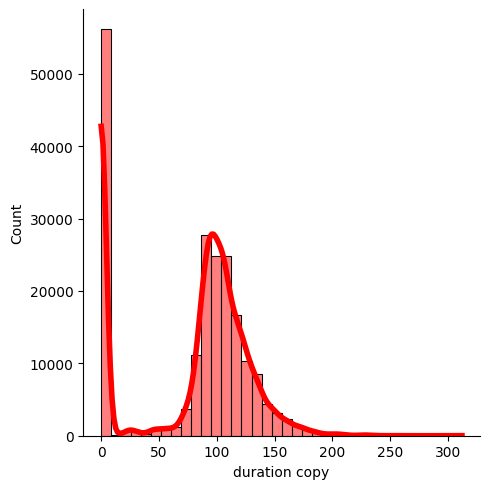

In [58]:
sns.displot(data = nd2, x ="duration copy",
            kde = True,
            kind = "hist",
            bins = 36,
            color = "red", 
            edgecolor="black",
            line_kws={"linewidth": 4}
           )
plt.show()


created bins for Duration_copy columns

In [59]:
bins1 = [-1,1,60,80,100,120,150,200,315]
labels1 = ["<1", "1-60", "60-80", "80-100","100-120","120-150","150-200","200-315"]
nd2["duration copy"] = pd.cut(nd2["duration copy"],bins = bins1, labels = labels1)
nd2.head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description,duration copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",PG-13,90,2020,"As her father nears the end of his life, filmm...",80-100
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",<1
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",<1
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",<1
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",<1


replacing the duration column times with duration_copy column without seasons values.

In [60]:
nd2.loc[~nd2["duration"].str.contains("Season"),"duration"] = nd2.loc[~nd2["duration"].str.contains("Season"),"duration copy"]
nd2.drop(["duration copy"],axis = 1,inplace = True)
nd2.head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",PG-13,80-100,2020,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."


In [61]:
nd2["duration"].value_counts()

duration
80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
150-200        6737
60-80          6498
3 Seasons      5084
1-60           3732
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: count, dtype: int64

In [62]:
nd2[nd2["Countrys"] == "India"].head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description
87,Kota Factory,Unknown Directors,Mayur More,International TV Shows,India,s5,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,In a city of coaching centers known to train I...
88,Kota Factory,Unknown Directors,Mayur More,Romantic TV Shows,India,s5,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,In a city of coaching centers known to train I...
89,Kota Factory,Unknown Directors,Mayur More,TV Comedies,India,s5,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,In a city of coaching centers known to train I...
90,Kota Factory,Unknown Directors,Jitendra Kumar,International TV Shows,India,s5,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,In a city of coaching centers known to train I...
91,Kota Factory,Unknown Directors,Jitendra Kumar,Romantic TV Shows,India,s5,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,In a city of coaching centers known to train I...


In [63]:
nd2.dtypes

title           category
Directors         object
Actors            object
Genre             object
Countrys          object
show_id           object
type            category
date_added        object
rating          category
duration          object
release_year       int64
description       object
dtype: object

remove unwanted special charaters.
Titles such as Bahubali(Hindi Version),Bahubali(Tamil Version) were there. Since it's only one movie in different languages,
presence of brackets and content between brackets is removed.

In [64]:
nd2["title"]=nd2["title"].str.replace(r"\(.*\)", "")

In [65]:
nd2.head(5)

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",PG-13,80-100,2020,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t..."


In [140]:
Rajamouli = nd2[nd2["Directors"] == "S.S. Rajamouli"]
Rajamouli.head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description,modified_date,Weeks_added,Months_added,Year,diff
104539,Baahubali: The Beginning (English Version),S.S. Rajamouli,Prabhas,Action & Adventure,India,s4482,Movie,"October 24, 2018",TV-14,120-150,2015,Villagers in the kingdom of Mahismati rescue a...,2018-10-24,43,10,2018,3
104540,Baahubali: The Beginning (English Version),S.S. Rajamouli,Prabhas,Dramas,India,s4482,Movie,"October 24, 2018",TV-14,120-150,2015,Villagers in the kingdom of Mahismati rescue a...,2018-10-24,43,10,2018,3
104541,Baahubali: The Beginning (English Version),S.S. Rajamouli,Prabhas,International Movies,India,s4482,Movie,"October 24, 2018",TV-14,120-150,2015,Villagers in the kingdom of Mahismati rescue a...,2018-10-24,43,10,2018,3
104542,Baahubali: The Beginning (English Version),S.S. Rajamouli,Rana Daggubati,Action & Adventure,India,s4482,Movie,"October 24, 2018",TV-14,120-150,2015,Villagers in the kingdom of Mahismati rescue a...,2018-10-24,43,10,2018,3
104543,Baahubali: The Beginning (English Version),S.S. Rajamouli,Rana Daggubati,Dramas,India,s4482,Movie,"October 24, 2018",TV-14,120-150,2015,Villagers in the kingdom of Mahismati rescue a...,2018-10-24,43,10,2018,3


In [67]:
nd2.dtypes

title             object
Directors         object
Actors            object
Genre             object
Countrys          object
show_id           object
type            category
date_added        object
rating          category
duration          object
release_year       int64
description       object
dtype: object

In [68]:
nd2["date_added"].isnull().sum()

0

modified the date_added columns in correct format.
split the modified date_added columns and save it as weeks , years , months.

In [69]:

nd2["modified_date"] =nd2["date_added"].apply(lambda x: parse(x).strftime("%Y-%m-%d")if x else None) 
nd2["modified_date"] =pd.to_datetime(nd2["modified_date"],errors='coerce')
nd2["Weeks_added"] = nd2["modified_date"].dt.isocalendar().week
nd2["Months_added"] = nd2["modified_date"].dt.month
nd2["Year"] = nd2["modified_date"].dt.year
nd2.head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description,modified_date,Weeks_added,Months_added,Year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",PG-13,80-100,2020,"As her father nears the end of his life, filmm...",2021-09-25,38,9,2021
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021


In [70]:
nd2.dtypes

title                    object
Directors                object
Actors                   object
Genre                    object
Countrys                 object
show_id                  object
type                   category
date_added               object
rating                 category
duration                 object
release_year              int64
description              object
modified_date    datetime64[ns]
Weeks_added              UInt32
Months_added              int32
Year                      int32
dtype: object

In [71]:
nd2["modified_date"].isnull().sum()

0

In [72]:
nd2["Months_added"]= nd2["Months_added"].fillna(0).astype(int)
nd2['Year'] = nd2['Year'].fillna(0).astype(int)


In [73]:
nd2["Year"].value_counts()

Year
2019    47033
2020    46025
2021    36541
2018    35785
2017    25233
2016     8614
2015     1560
2014      450
2011      438
2013      207
2012       36
2009       30
2010       20
2008       19
Name: count, dtype: int64

In [74]:
nd2["Months_added"].value_counts() 

Months_added
7     20358
12    18266
1     18254
9     18143
10    17769
8     17110
4     17108
6     16659
3     15841
11    15596
5     13827
2     13060
Name: count, dtype: int64

Univariate Analysis in terms of counts of each column

number of distinct titles on the basis of genre.

In [75]:
nd2.groupby(["Genre"]).agg({"title" : "nunique"}).sort_values(by =["title"] ,ascending = False)

,title
Genre,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


number of distinct titles on the basis of genre in visualization.

<BarContainer object of 15 artists>

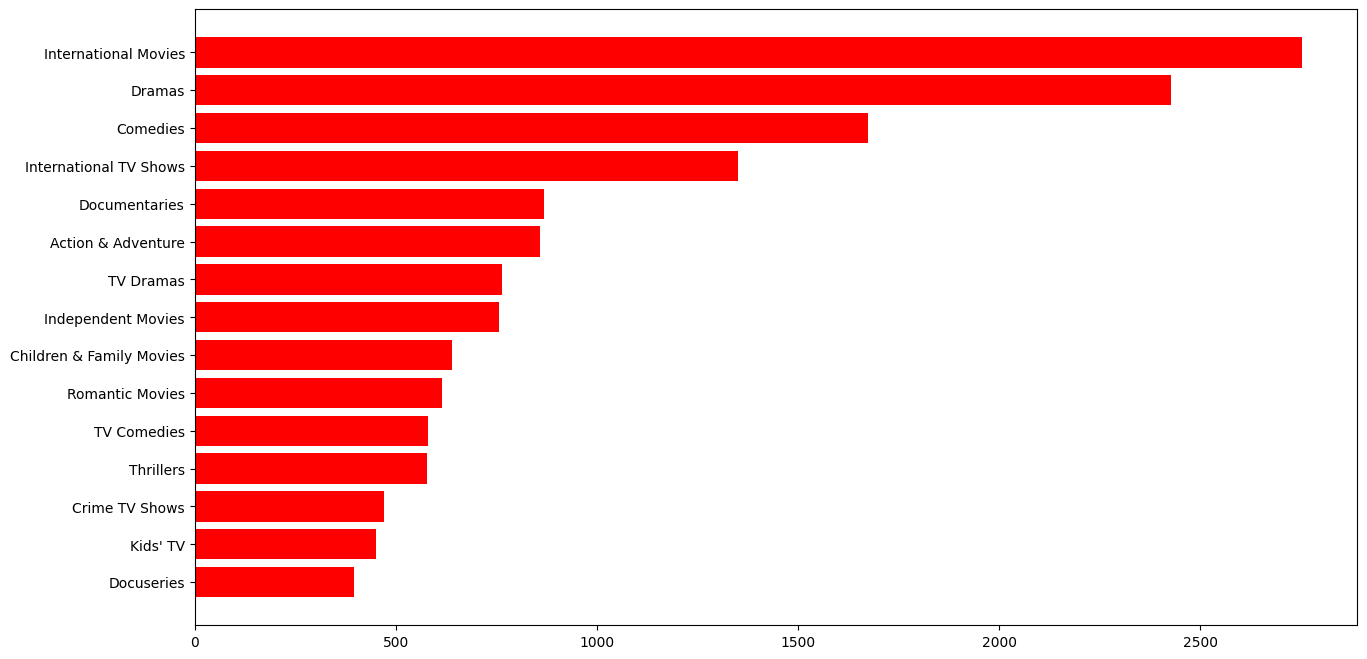

In [76]:
nd2_genre = nd2.groupby(["Genre"]).agg({"title":"nunique"}).reset_index().sort_values (by= ["title"],ascending = False)[:15]
plt.figure(figsize= (15,8))
plt.barh(nd2_genre[::-1]["Genre"],nd2_genre[::-1]["title"], color = "red")

International Movies, Dramas, Comedies are the most popular

number of distinct titles on the basis of type

In [77]:
nd2.groupby(["type"]).agg({"title" : "nunique"})

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_1168\3117695378.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nd2.groupby(["type"]).agg({"title" : "nunique"})


,title
type,
Movie,6131
TV Show,2676


C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_1168\1390934269.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  types = nd2.groupby(["type"]).agg({"title": "nunique"}).reset_index()


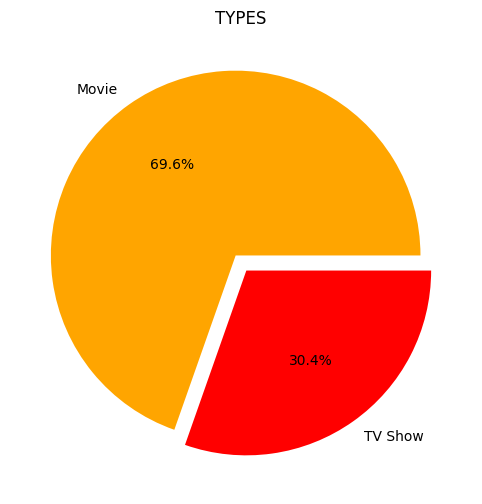

In [78]:
types = nd2.groupby(["type"]).agg({"title": "nunique"}).reset_index()
plt.figure(figsize = (12,6))
plt.pie(types["title"],labels = types["type"],colors = ["orange", "red"], autopct = "%.1f%%",explode = (0.05,0.05))
plt.title("TYPES")
plt.show()


We have 69.6:30.4 ratio of Movies and TV Shows in our data

number of distinct titles on the basis of country

In [79]:
nd2.groupby(["Countrys"]).agg({"title": "nunique"})

,title
Countrys,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
Argentina,94
Armenia,1
Australia,162
Austria,12


The above dataframe shows a flaw in which we are seeing countries, such as  United States and United States or poland and poland, are shown as different countries.They should have been same

In [80]:
nd2["Countrys"] = nd2["Countrys"].str.replace(",","")

In [81]:
nd2.groupby(["Countrys"]).agg({"title": "nunique"})

,title
Countrys,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
Argentina,94
Armenia,1
Australia,162
Austria,12


number of distinct titles on the basis of country in visualization.

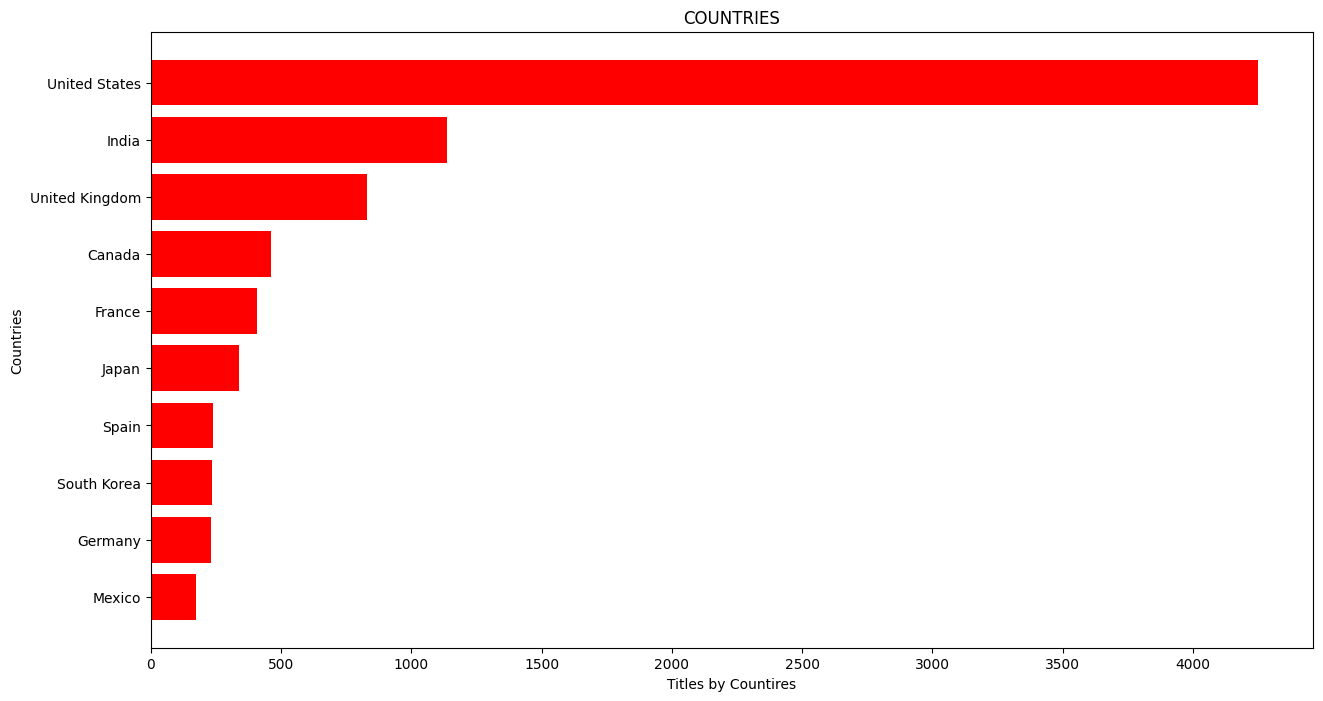

In [82]:
nd2_countrys = nd2.groupby(["Countrys"]).agg({"title": "nunique"}).reset_index().sort_values(by = ["title"],ascending = False)[:10]
plt.figure(figsize=(15,8))
plt.barh(nd2_countrys[::-1]["Countrys"],nd2_countrys[::-1]["title"],color = ["red"])
plt.xlabel("Titles by Countires")
plt.ylabel("Countries")
plt.title("COUNTRIES")
plt.show()

united states, india, United kingdom are top 3 countries in Content Creation on Netflix

number of distinct titles on the basis of rating

In [83]:
nd2.groupby(["rating"]).agg({"title" : "nunique"})

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_1168\2174172577.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nd2.groupby(["rating"]).agg({"title" : "nunique"})


,title
rating,
66 min,0
74 min,0
84 min,0
G,41
NC-17,3
NR,87
PG,287
PG-13,490
R,799


number of distinct titles on the basis of rating in visualization.

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_1168\567217140.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nd2_rating = nd2.groupby("rating").agg({"title": "nunique"}).reset_index().sort_values(by = ["title"], ascending = False)


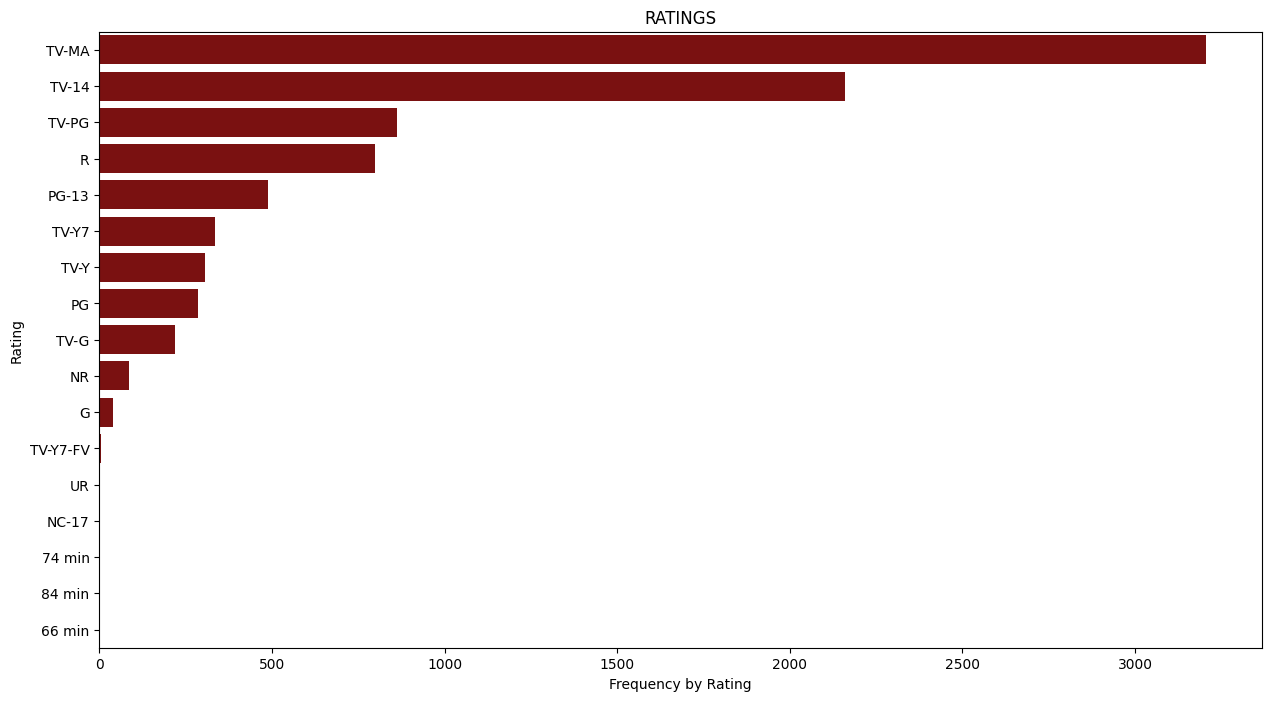

In [84]:
nd2_rating = nd2.groupby("rating").agg({"title": "nunique"}).reset_index().sort_values(by = ["title"], ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(data = nd2_rating, y= "rating" ,x = "title",color = "darkred" ,order=nd2_rating.sort_values('title', ascending=False).rating)
plt.xlabel("Frequency by Rating")
plt.ylabel ("Rating")
plt.title("RATINGS")

plt.show()

TV-PG = Parental Guidance Suggested.

TV-14 = unsuitable for children under 14 years of age.

TV-MA = Mature audie

Most of the highly rated content on Netflix is intended for Mature Audiences, content not intended for audience under 14 and those which require Parental Guidancences

number of distinct titles on the basis of duration

In [85]:
nd2.groupby(["duration"]).agg({"title":"nunique"})

,title
duration,
1 Season,1793
1-60,487
10 Seasons,7
100-120,1672
11 Seasons,2
12 Seasons,2
120-150,897
13 Seasons,3
15 Seasons,2


number of distinct titles on the basis of duration in visualization

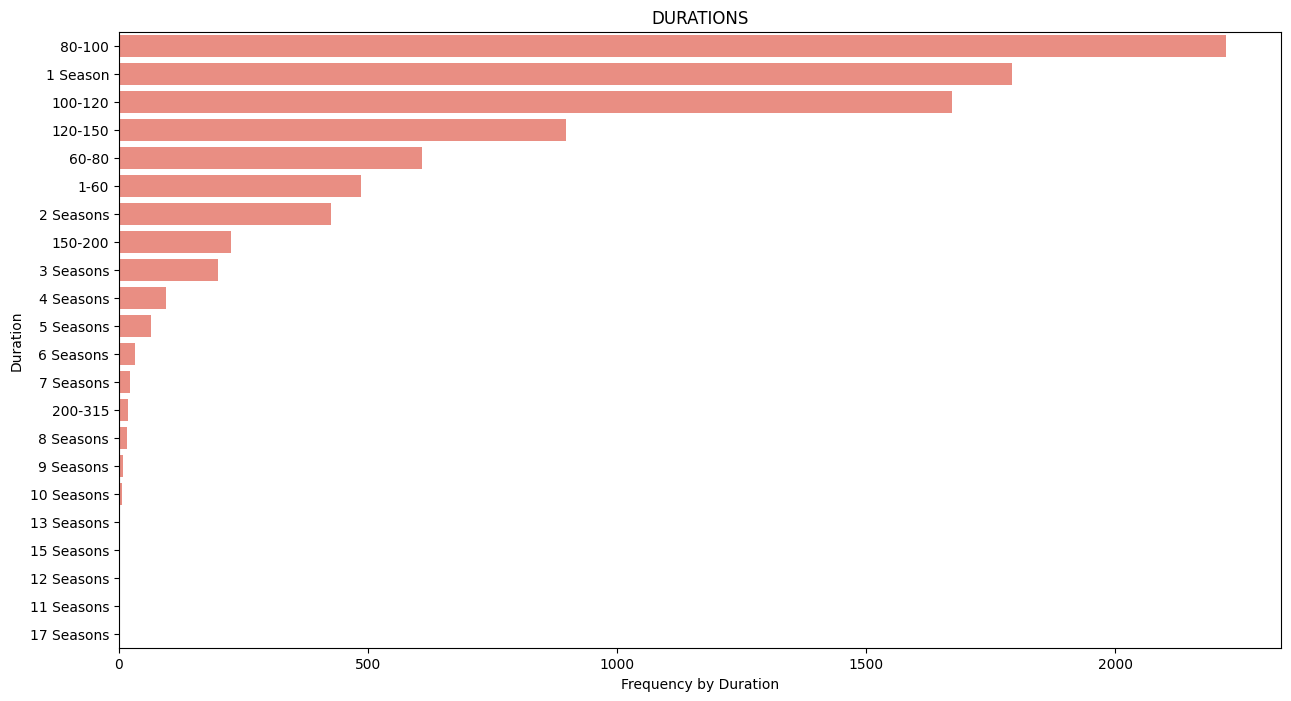

In [86]:
nd2_duration = nd2.groupby(["duration"]).agg({"title": "nunique"}).reset_index().sort_values(by = ["title"], ascending = False)
plt.figure(figsize =(15,8))
sns.barplot(nd2_duration, x = "title", y = "duration", color = "salmon", order = nd2_duration.sort_values("title",ascending = False).duration)
plt.xlabel("Frequency by Duration")
plt.ylabel("Duration")
plt.title("DURATIONS")
plt.show()

most watched content of frequent durations in netflix 80-100, season1, 100-120

number of distinct titles on the basis of Actors

In [87]:
ACT = nd2.groupby(["Actors"]).agg({"title":"nunique"})
ACT.head()

,title
Actors,
Jr.,2
"""Riley"" Lakdhar Dridi",1
'Najite Dede,2
2 Chainz,1
2Mex,1


number of distinct titles on the basis of Actors in visualization

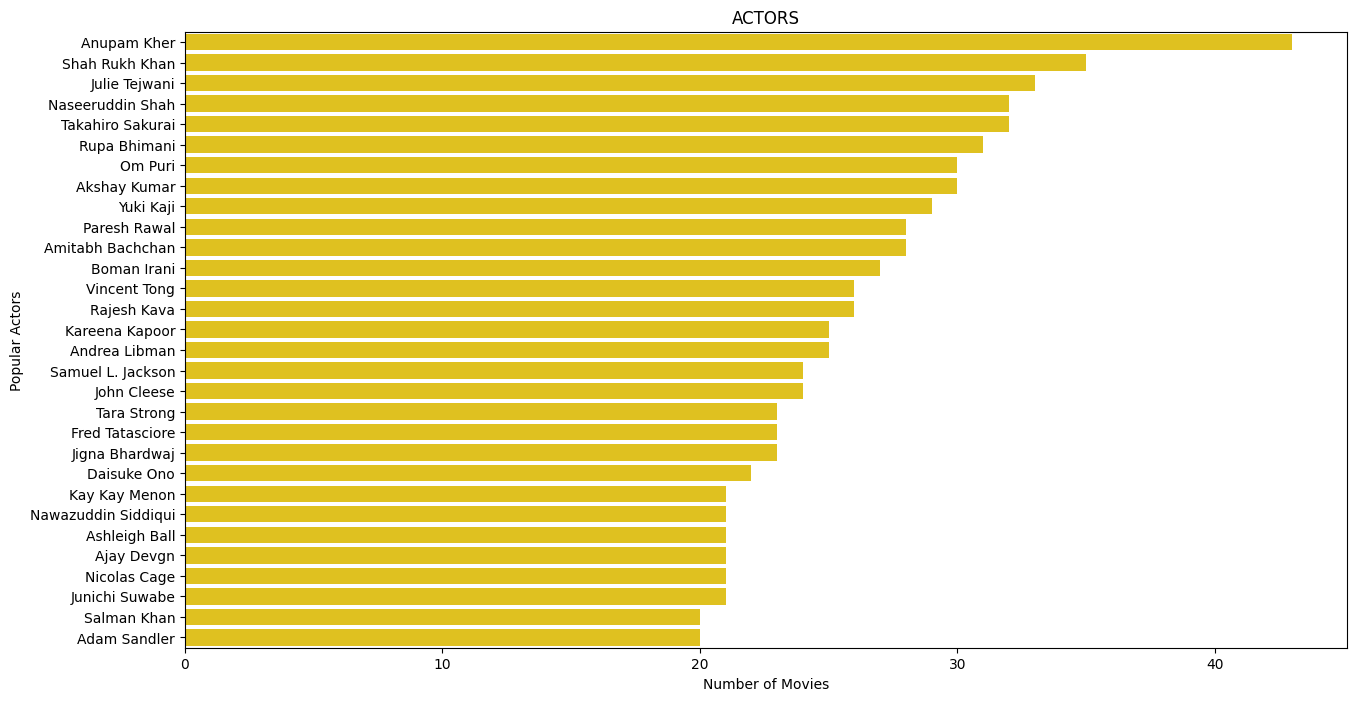

In [88]:
nd2_actors = nd2.groupby(["Actors"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:31]
nd2_actors = nd2_actors[nd2_actors["Actors"] != "Unknown Actors"]
plt.figure(figsize = (15,8))
sns.barplot(nd2_actors, x = "title", y = "Actors", color = "gold", order = nd2_actors.sort_values("title" ,ascending = False).Actors)
plt.xlabel("Number of Movies")
plt.ylabel("Popular Actors")
plt.title("ACTORS")
plt.show()



most popular actor in most watched netflix content. Anupam kher, Shah rukh khan, julie tejwani

number of distinct titles on the basis of Directors

In [89]:
DIR = nd2.groupby(["Directors"]).agg({"title":"nunique"})
DIR.head()

,title
Directors,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1


number of distinct titles on the basis of Directors in visualization

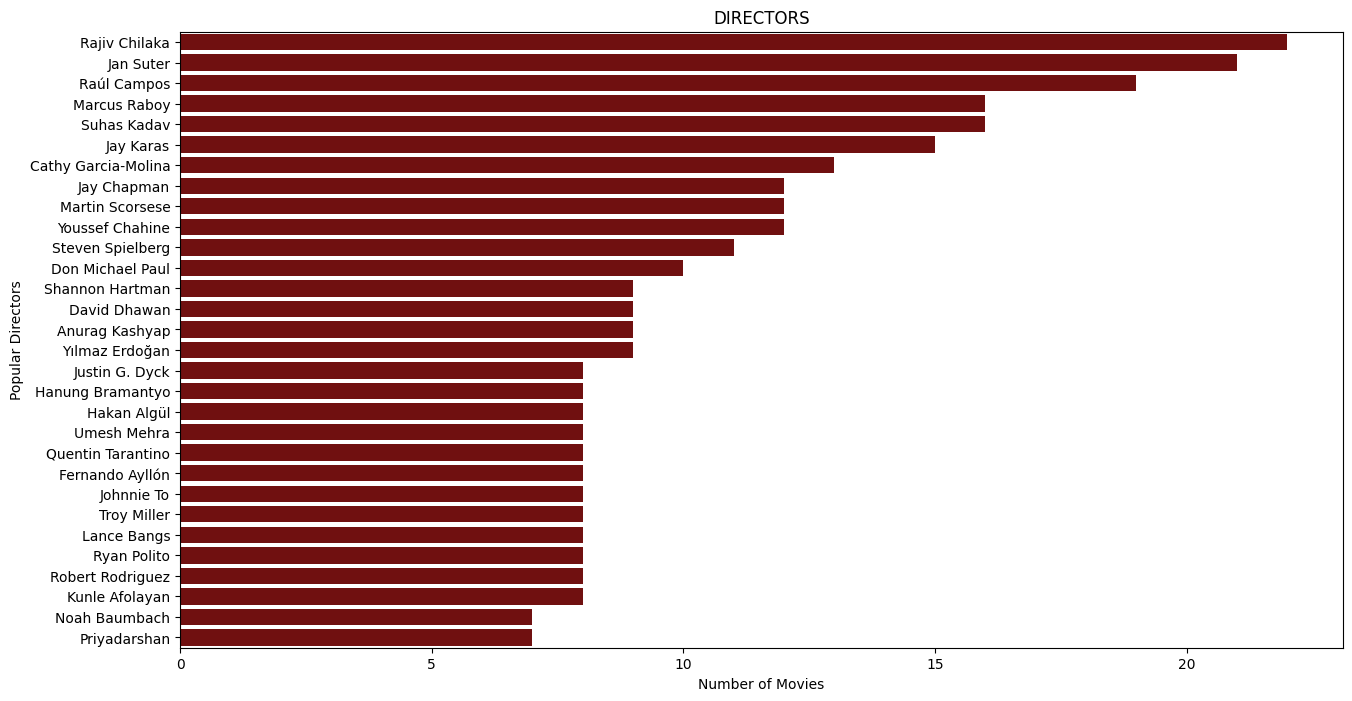

In [90]:
nd2_directors = nd2.groupby(["Directors"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:31]
nd2_directors = nd2_directors[nd2_directors["Directors"]!= "Unknown Directors"]
plt.figure(figsize=(15,8))
sns.barplot(nd2_directors, x = "title", y = "Directors", color = "maroon" , order = nd2_directors.sort_values("title", ascending = False).Directors)
plt.xlabel("Number of Movies")
plt.ylabel("Popular Directors")
plt.title("DIRECTORS")
plt.show()


Rajiv Chilaka, jan suter, raul campos are most popular directors in most watched netflix content. 

number of distinct titles on the basis of year

In [91]:
nd2.groupby(["Year"]).agg({"title":"nunique"})

,title
Year,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,432


number of distinct titles on the basis of year in visualization.

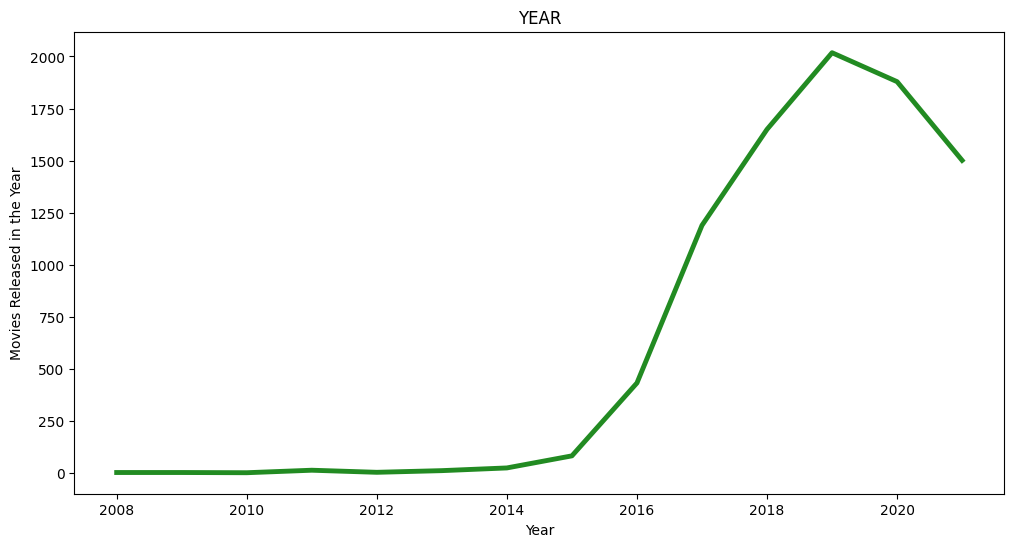

In [92]:
nd2_year = nd2.groupby(["Year"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(nd2_year, x = "Year", y = "title", color = "forestgreen",linewidth=3.5)
plt.xlabel("Year")
plt.ylabel("Movies Released in the Year")
plt.title("YEAR")
plt.show()

The Amount of Content across Netflix has increased from 2008 continuously till 2019. Then started decreasing from here(probably due to Covid)

number of distinct titles on the basis of Months_added

In [93]:
nd2.groupby(["Months_added"]).agg({"title":"nunique"})

,title
Months_added,
1,738
2,563
3,742
4,765
5,632
6,728
7,832
8,756
9,772


number of distinct titles on the basis of Months_added in visualization

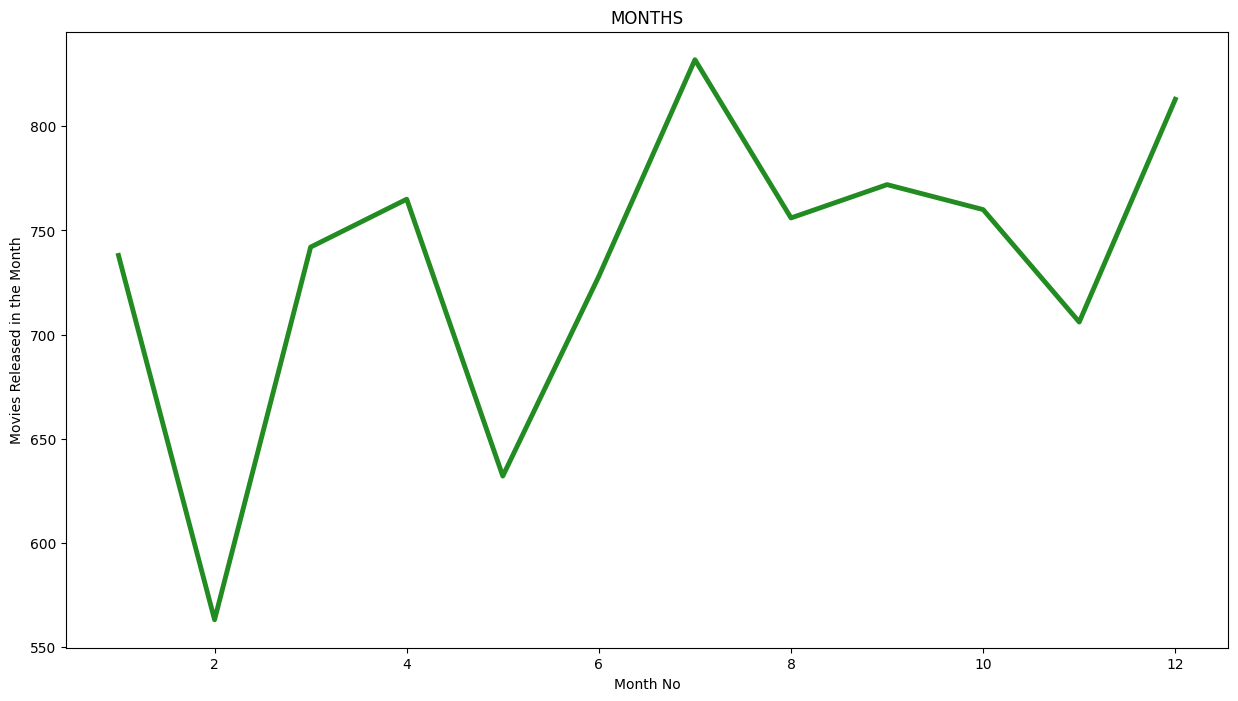

In [94]:
nd2_Months = nd2.groupby(["Months_added"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(nd2_Months, x = "Months_added", y = "title", color = "forestgreen",linewidth=3.5)
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month No")
plt.title("MONTHS")
plt.show()


Most of the content is added in the first, mid and last months across Netflix

number of distinct titles on the basis of weeks_added

In [95]:
nd2.groupby(["Weeks_added"]).agg({"title":"nunique"})

,title
Weeks_added,
1,372
2,108
3,113
4,88
5,208
6,97
7,147
8,110
9,254


number of distinct titles on the basis of weeks_added

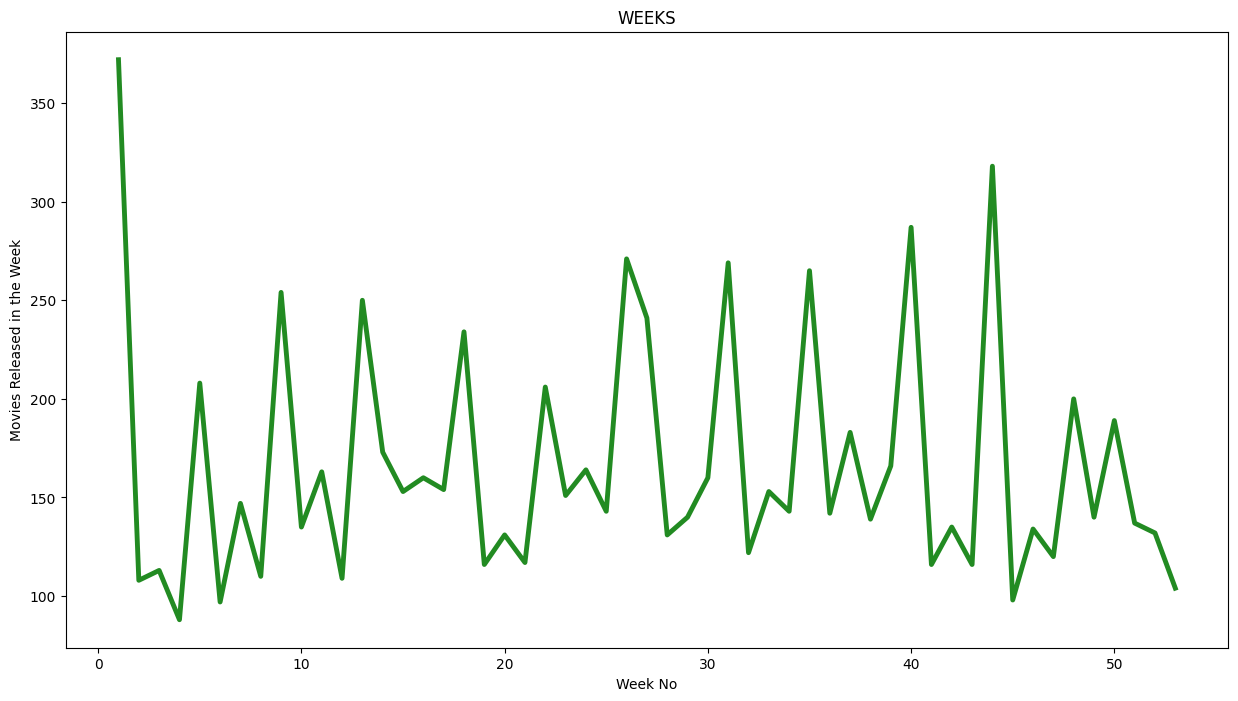

In [96]:
nd2_Weeks = nd2.groupby(["Weeks_added"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize = (15,8))
sns.lineplot(nd2_Weeks, x = "Weeks_added", y = "title",color = "forestgreen",linewidth=3.5)
plt.xlabel("Week No")
plt.ylabel("Movies Released in the Week")
plt.title("WEEKS")
plt.show()

Most of the Content across Netflix is added in the first week of the year and it follows a bit of a cyclical pattern

number of distinct titles on the basis of release_year

In [97]:
nd2.groupby(["release_year"]).agg({"title":"nunique"})

,title
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
1946,2
1947,1
1954,2
1955,3


number of distinct titles on the basis of release_year

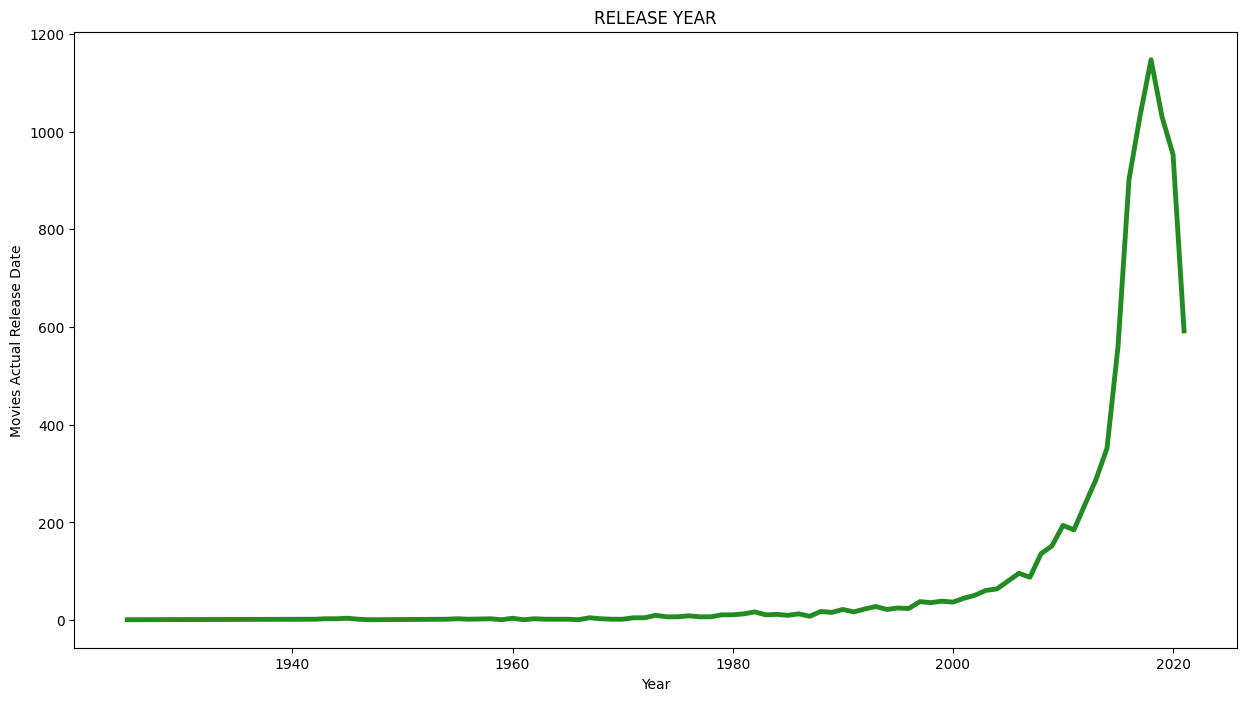

In [98]:
nd2_release_years = nd2.groupby(["release_year"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize = (15,8))
sns.lineplot(nd2_release_years, x = "release_year", y = "title",color = "forestgreen",linewidth=3.5)
plt.xlabel("Year")
plt.ylabel("Movies Actual Release Date")
plt.title("RELEASE YEAR")
plt.show()

Net content release which are later uploaded to Netflix has increased since 1980 till 2020 though later reduced certainly due to COVID-19

Movie and Shows level Univariate analysis

we create a seperate table for movies and shows.

In [99]:
nd2_shows = nd2[nd2["type"]== "TV Show"]
nd2_Movies = nd2[nd2["type"]== "Movie"]

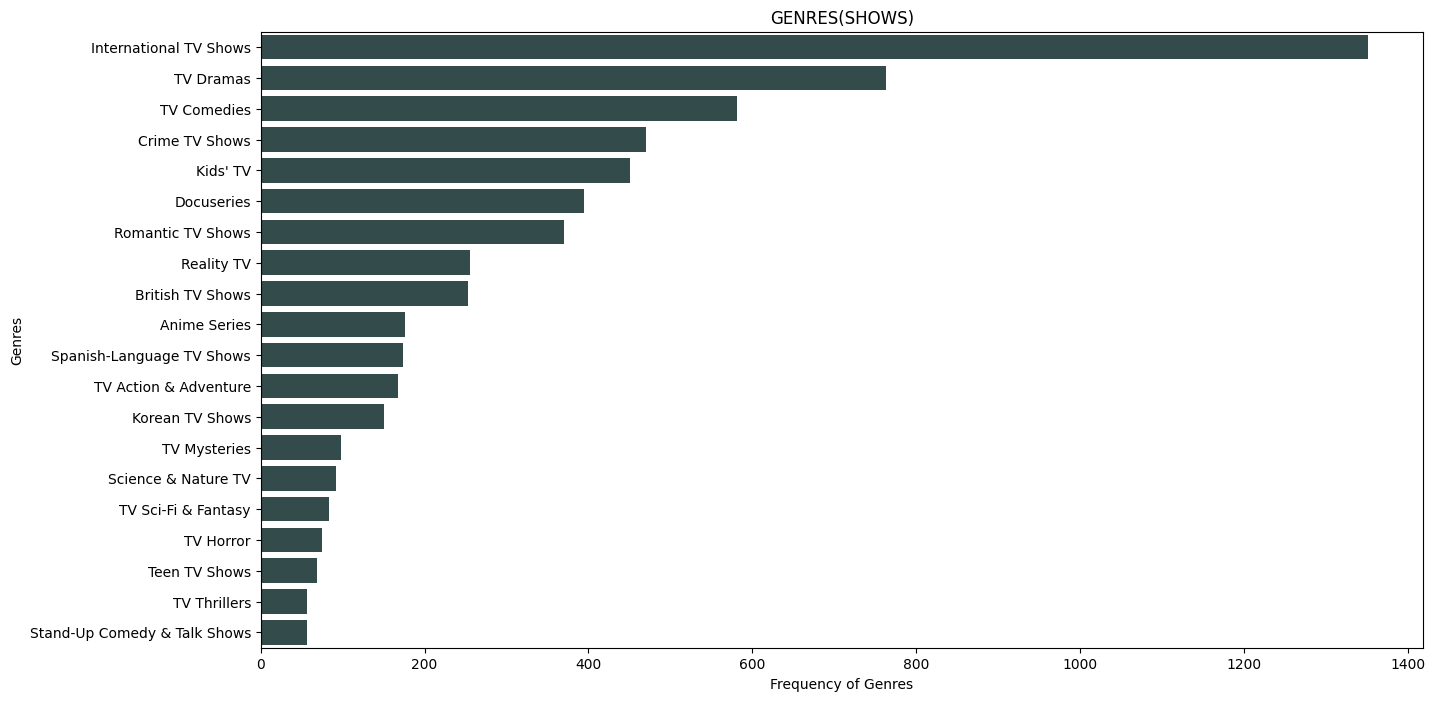

In [100]:
nd2_shows_Genres = nd2_shows.groupby(["Genre"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:20]
plt.figure(figsize = (15,8))
sns.barplot(nd2_shows_Genres, x = "title" , y = "Genre", color = "darkslategrey",order = nd2_shows_Genres.sort_values("title", ascending = False).Genre)
plt.xlabel("Frequency of Genres")
plt.ylabel("Genres")
plt.title("GENRES(SHOWS)")
plt.show()

International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix

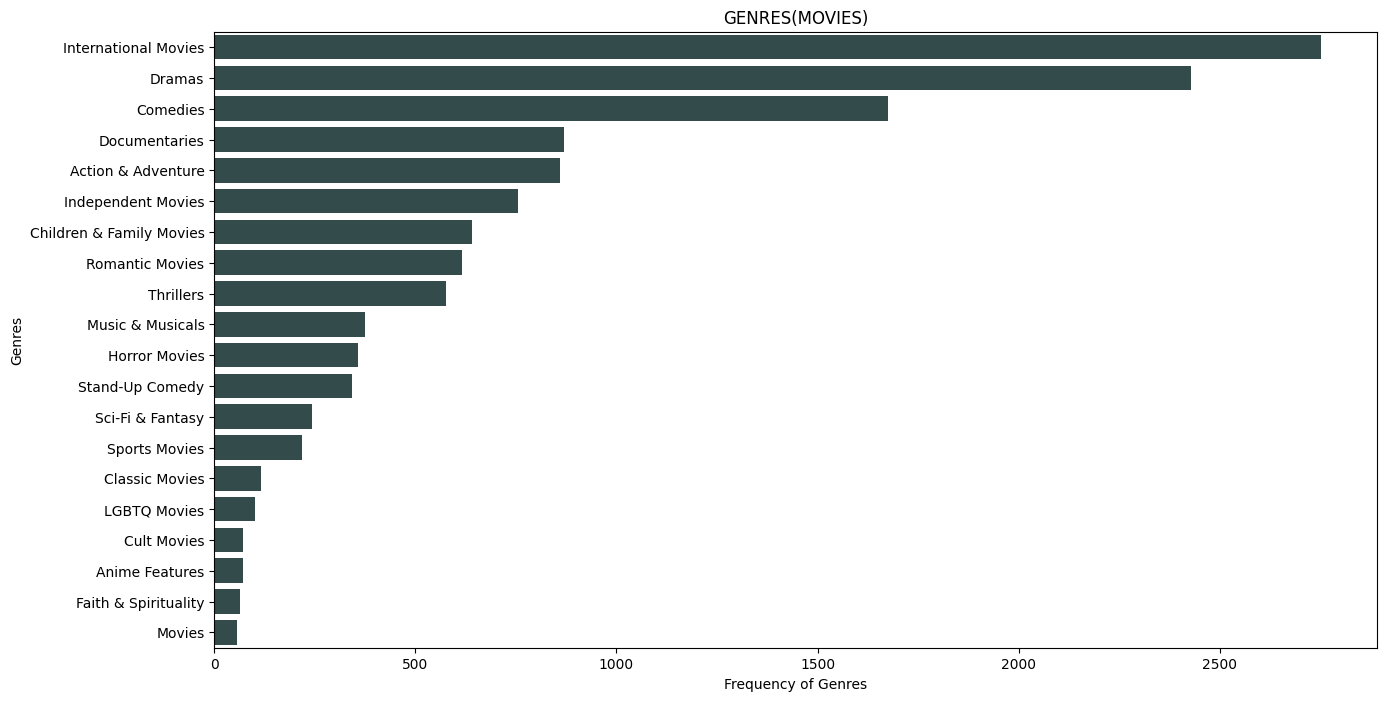

In [101]:
nd2_Movies_Genres = nd2_Movies.groupby(["Genre"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:20]
plt.figure(figsize = (15,8))
sns.barplot(nd2_Movies_Genres, x = "title" , y = "Genre", color = "darkslategrey",order = nd2_Movies_Genres.sort_values("title", ascending = False).Genre)
plt.xlabel("Frequency of Genres")
plt.ylabel("Genres")
plt.title("GENRES(MOVIES)")
plt.show()

International movies, Dramas and Comedy Genres are popular across movies in Netflix

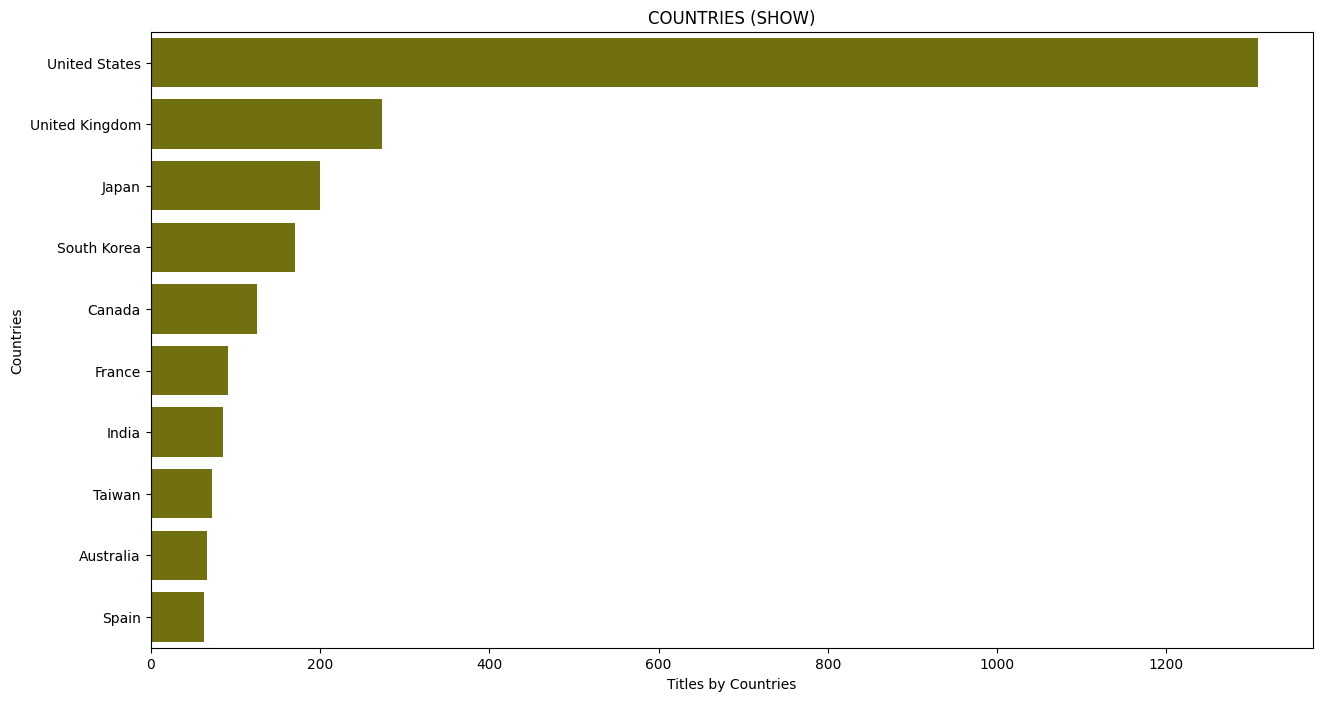

In [102]:
nd2_shows_Country = nd2_shows.groupby(["Countrys"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:10]
plt.figure(figsize = (15,8))
sns.barplot(nd2_shows_Country , x = "title" , y = "Countrys", color = "olive",order = nd2_shows_Country.sort_values("title", ascending = False).Countrys)
plt.xlabel("Titles by Countries")
plt.ylabel("Countries")
plt.title("COUNTRIES (SHOW)")
plt.show()

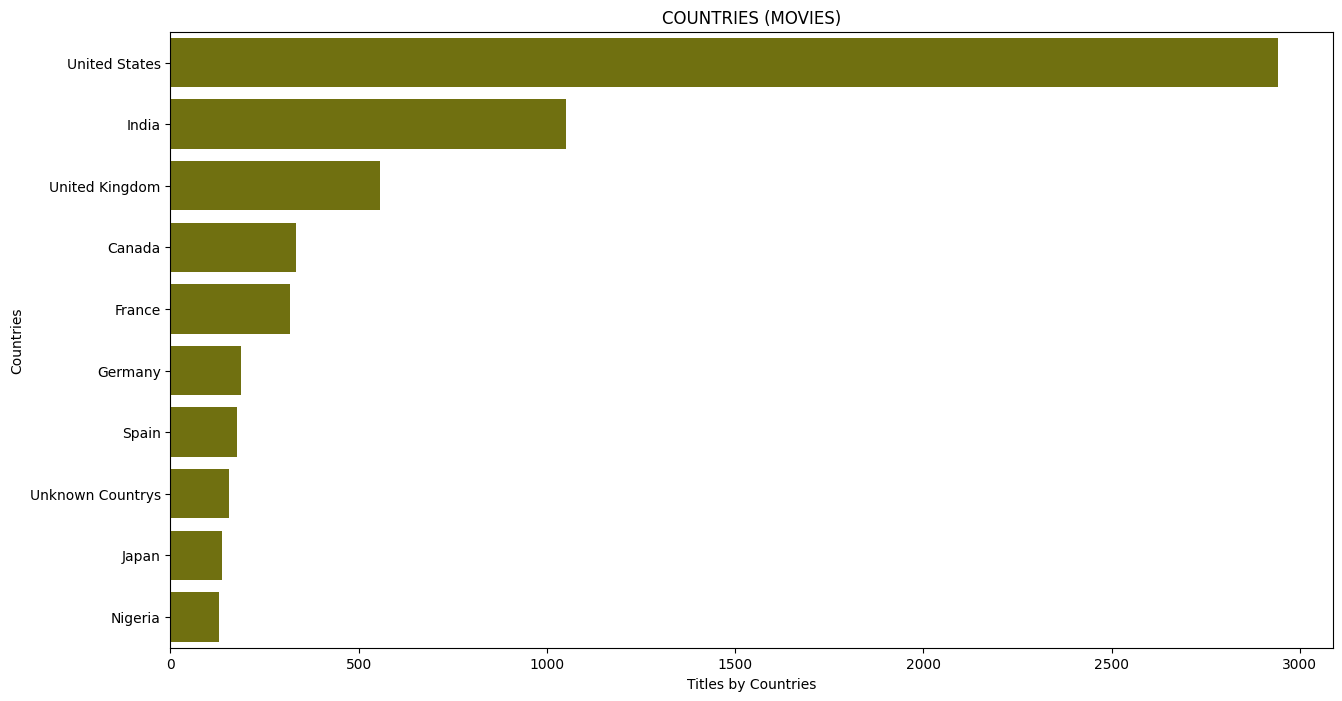

In [103]:
nd2_Movies_Country = nd2_Movies.groupby(["Countrys"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:10]
plt.figure(figsize = (15,8))
sns.barplot(nd2_Movies_Country , x = "title" , y = "Countrys", color = "olive",order = nd2_Movies_Country.sort_values("title", ascending = False).Countrys)
plt.xlabel("Titles by Countries")
plt.ylabel("Countries")
plt.title("COUNTRIES (MOVIES)")
plt.show()

United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows.
Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since India was rated as second in net sum of whole content across Netflix.

RATING FOR SHOWS

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_1168\3652443660.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nd2_shows_Rating = nd2_shows.groupby(["rating"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:10]


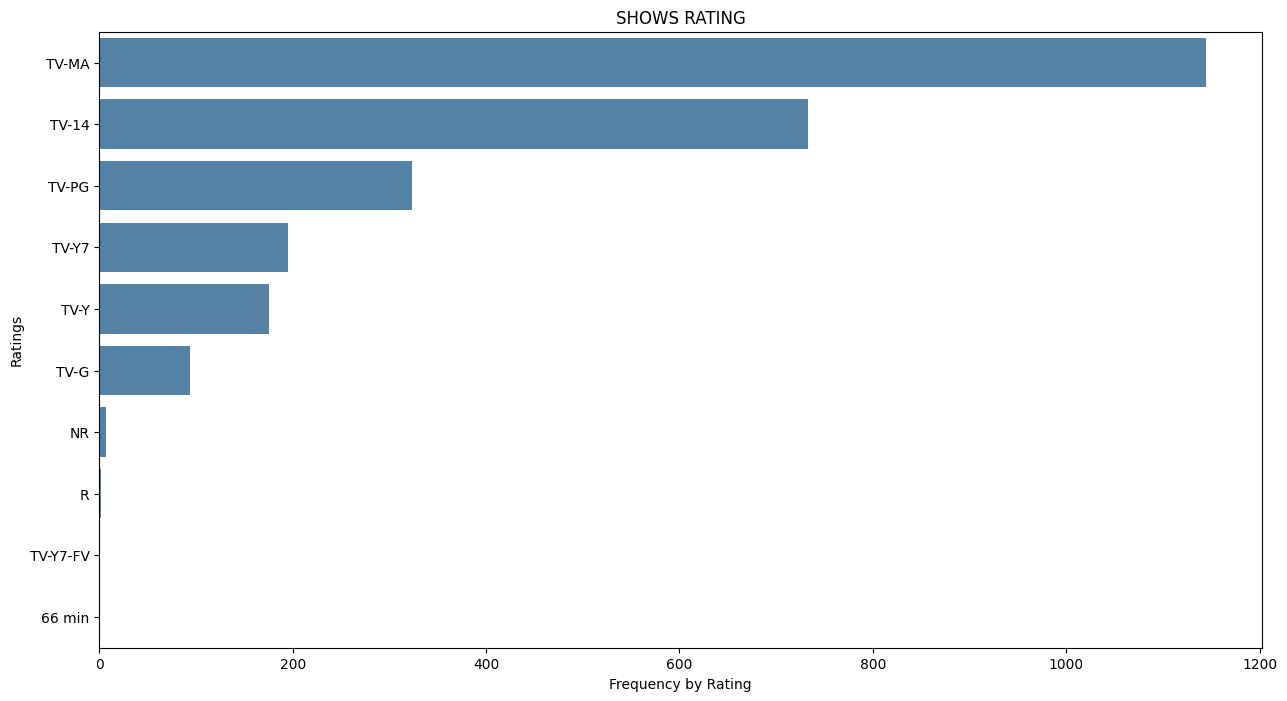

In [104]:
nd2_shows_Rating = nd2_shows.groupby(["rating"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:10]
plt.figure(figsize=(15,8))
sns.barplot(nd2_shows_Rating, x = "title", y = "rating", color = "steelblue", order =nd2_shows_Rating.sort_values(by = "title", ascending = False).rating )
plt.xlabel("Frequency by Rating")
plt.ylabel("Ratings")
plt.title("SHOWS RATING")
plt.show()

C:\Users\satheeskumar\AppData\Local\Temp\ipykernel_1168\1125994681.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nd2_Movies_Rating = nd2_Movies.groupby(["rating"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:15]


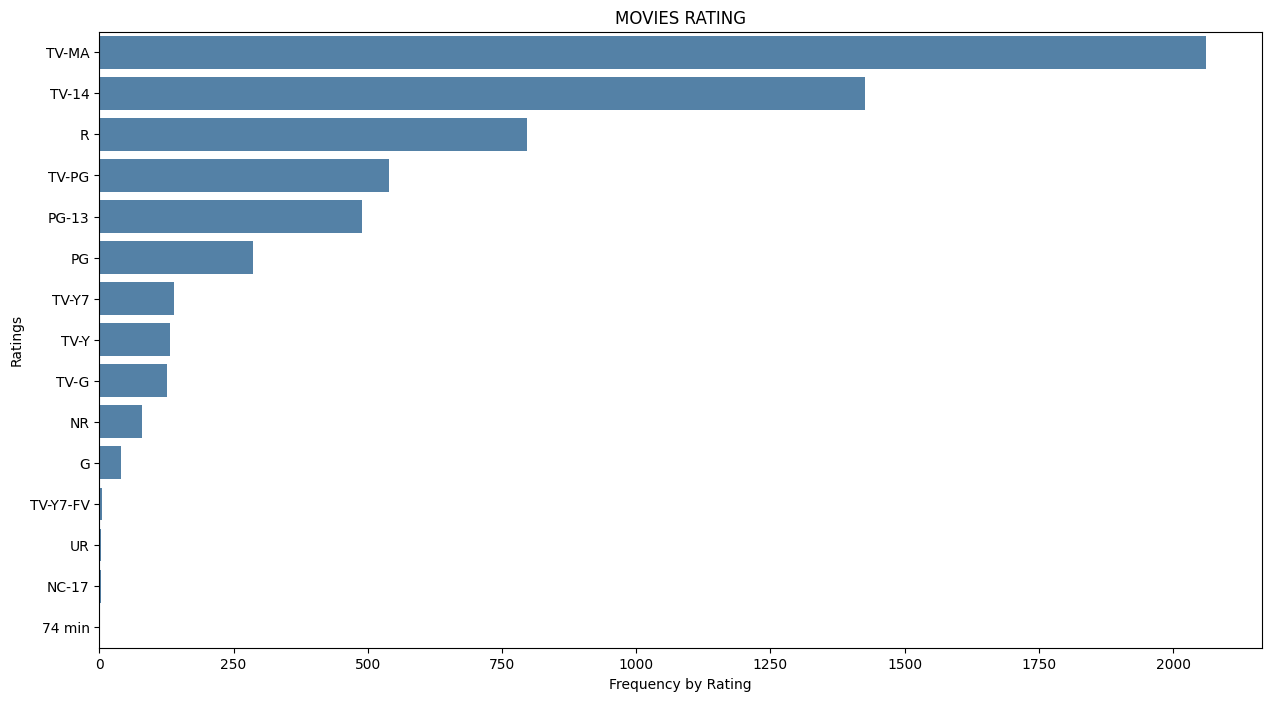

In [105]:
nd2_Movies_Rating = nd2_Movies.groupby(["rating"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:15]
plt.figure(figsize=(15,8))
sns.barplot(nd2_Movies_Rating, x = "title", y = "rating", color = "steelblue", order =nd2_Movies_Rating.sort_values(by = "title", ascending = False).rating )
plt.xlabel("Frequency by Rating")
plt.ylabel("Ratings")
plt.title("MOVIES RATING")
plt.show()

So it seems plausible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages.

Moreover there are no TV Shows having a rating of R



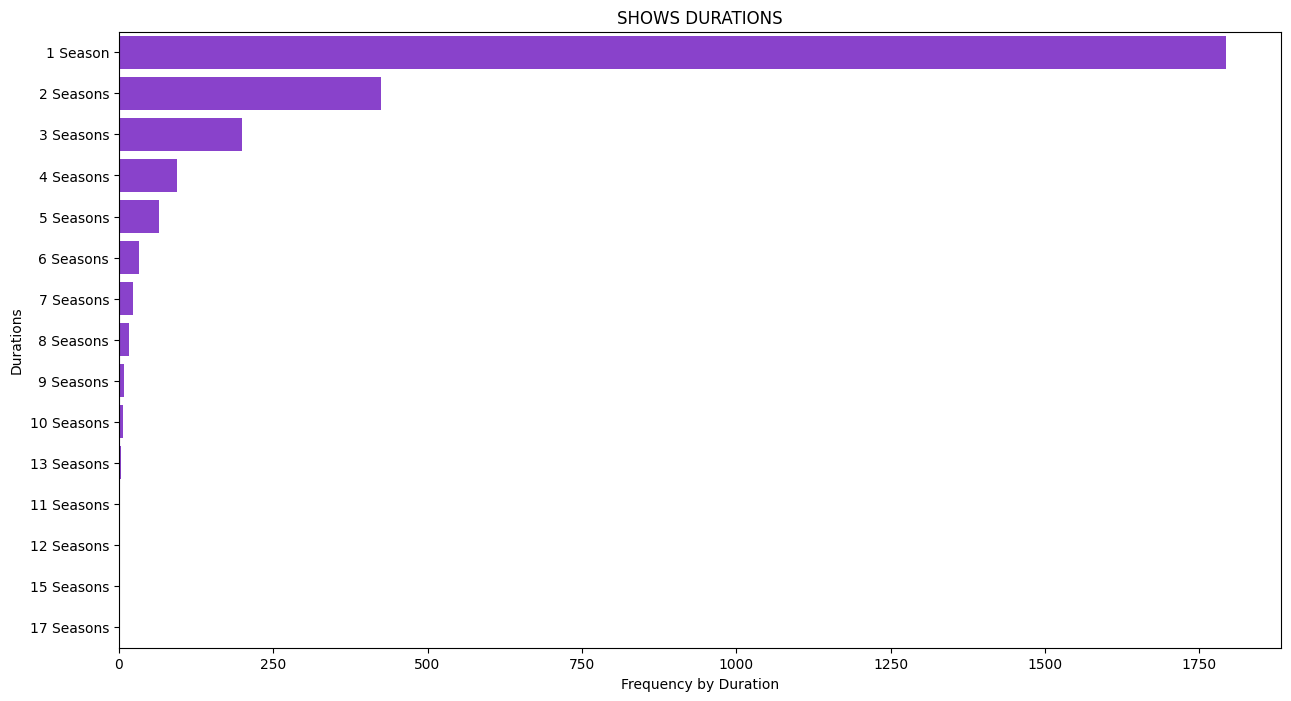

In [106]:
nd2_shows_Duration = nd2_shows.groupby(["duration"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:15]
plt.figure(figsize=(15,8))
sns.barplot(nd2_shows_Duration, x = "title", y = "duration", color = "blueviolet", order =nd2_shows_Duration.sort_values(by = "title", ascending = False).duration )
plt.xlabel("Frequency by Duration")
plt.ylabel("Durations")
plt.title("SHOWS DURATIONS")
plt.show()

Across TV Shows, shows having only 1 Season are common as soon as the season length increases, the number of shows decrease and this definitely sounds as expected

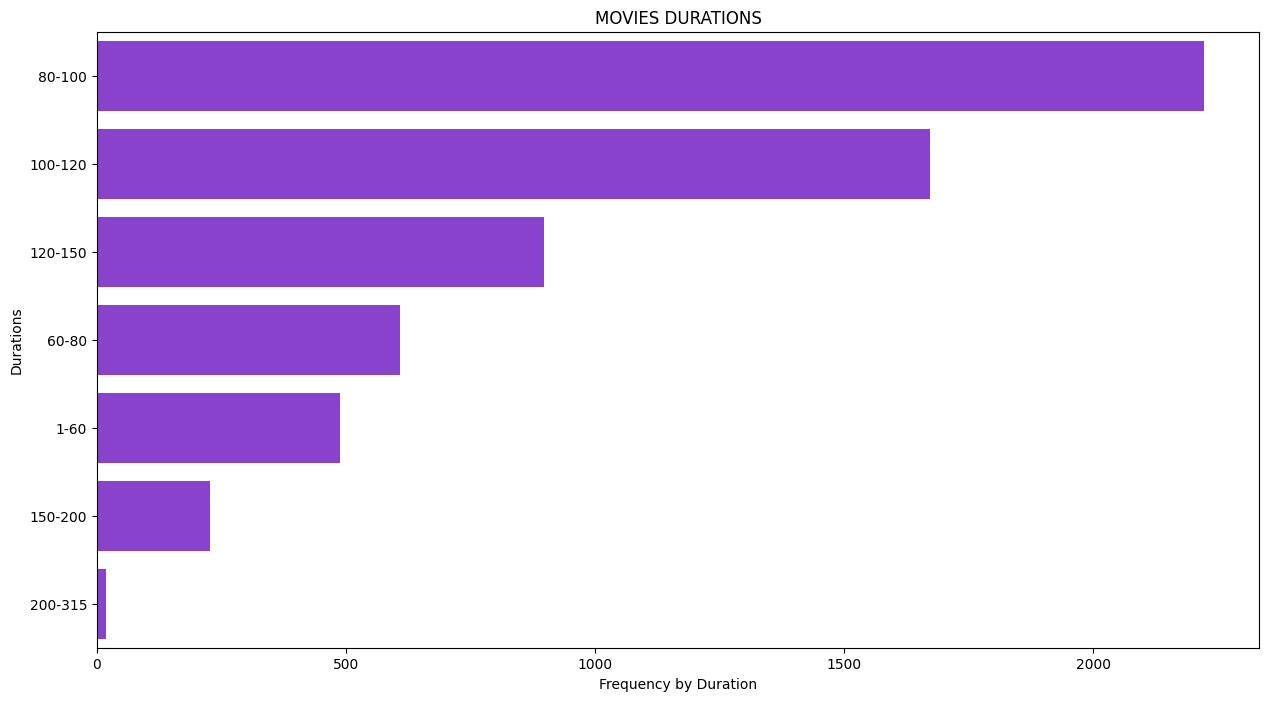

In [107]:
nd2_Movies_Duration = nd2_Movies.groupby(["duration"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:15]
plt.figure(figsize=(15,8))
sns.barplot(nd2_Movies_Duration, x = "title", y = "duration", color = "blueviolet", order =nd2_Movies_Duration.sort_values(by = "title", ascending = False).duration )
plt.xlabel("Frequency by Duration")
plt.ylabel("Durations")
plt.title("MOVIES DURATIONS")
plt.show()

Across movies 80-100,100-120 and 120-150 is the ranges of minutes for which most movies lie. So quite possibly 80-150 mins is the sweet spot we would be wanting for movies in netflix.

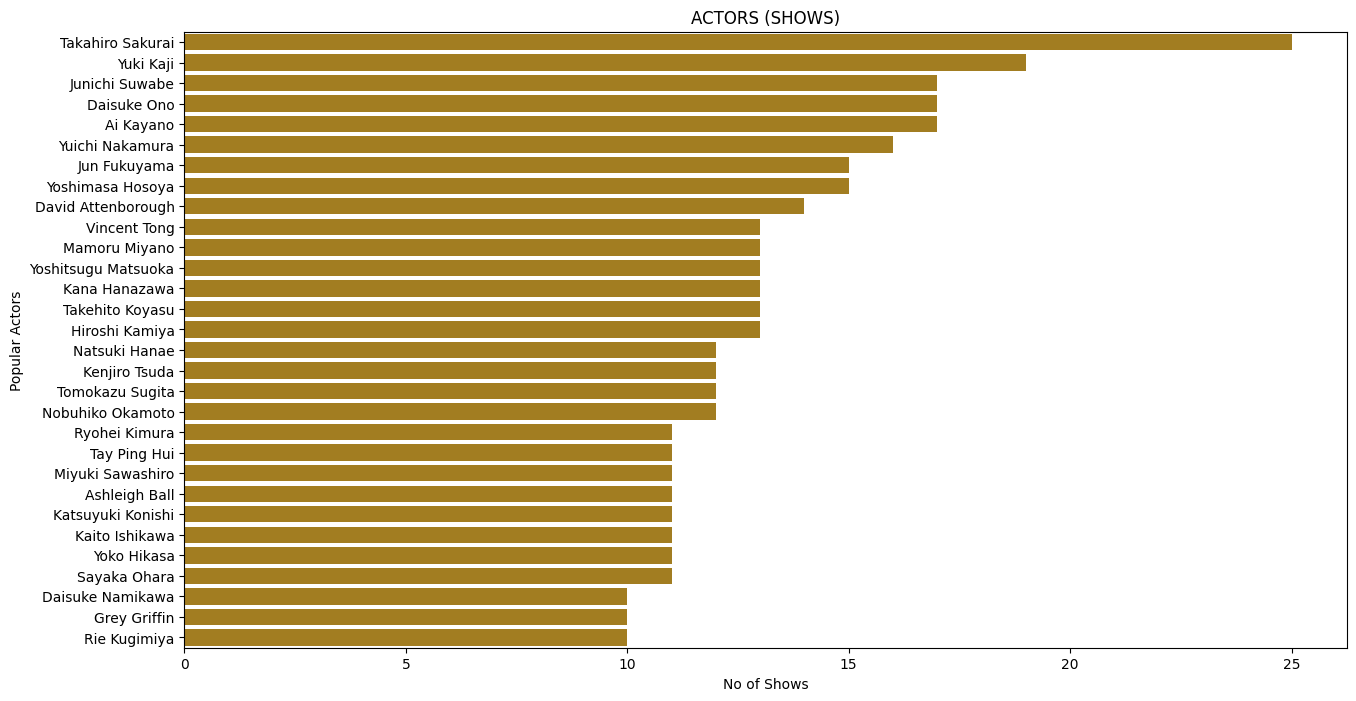

In [108]:
nd2_shows_actors = nd2_shows.groupby(["Actors"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:31]
nd2_shows_actors = nd2_shows_actors[nd2_shows_actors["Actors"]!= "Unknown Actors"]
plt.figure(figsize=(15,8))
sns.barplot(nd2_shows_actors, x = "title", y = "Actors", color = "darkgoldenrod", order =nd2_shows_actors.sort_values(by = "title", ascending = False).Actors)
plt.xlabel("No of Shows")
plt.ylabel("Popular Actors")
plt.title("ACTORS (SHOWS)")
plt.show()

Takahiro Sakurai,Yuki Kaji and junichi suwabe other South Korean/Japanese actors are the most popular actors across TV Shows

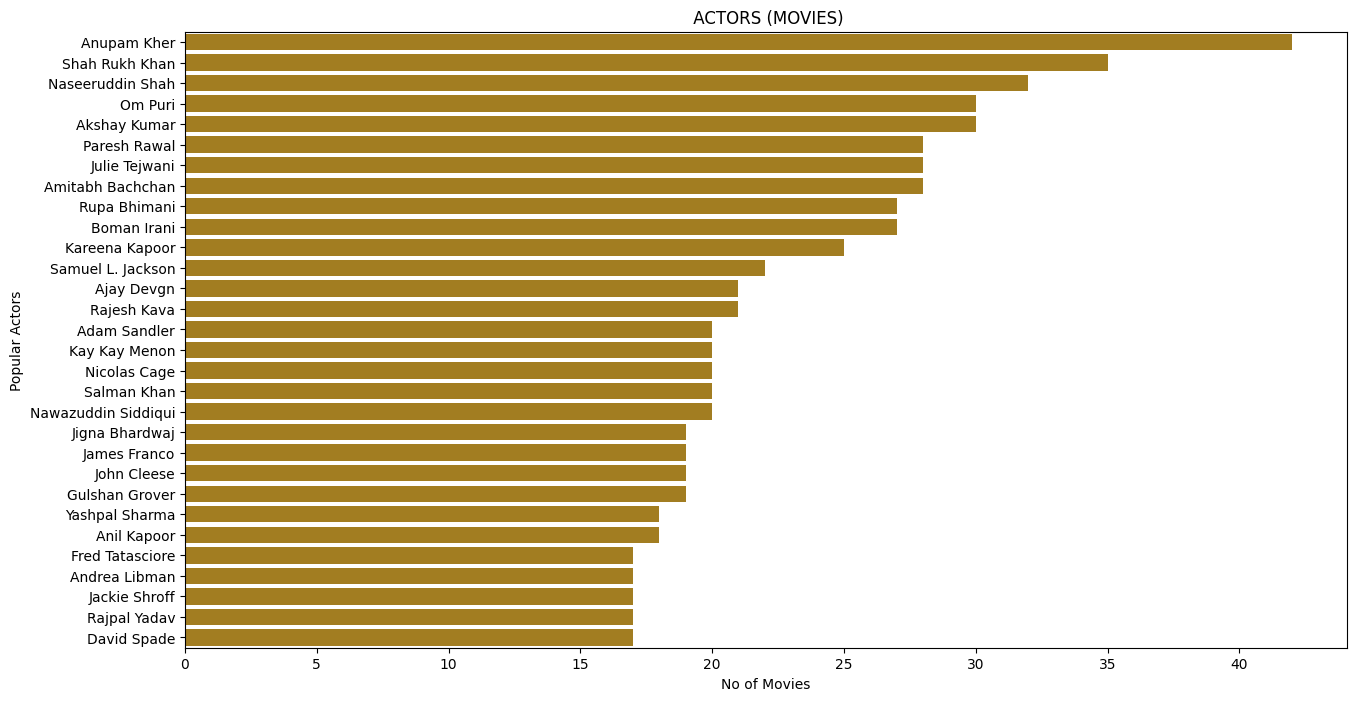

In [109]:
nd2_Movies_actors = nd2_Movies.groupby(["Actors"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:31]
nd2_Movies_actors = nd2_Movies_actors[nd2_Movies_actors["Actors"]!= "Unknown Actors"]
plt.figure(figsize=(15,8))
sns.barplot(nd2_Movies_actors, x = "title", y = "Actors", color = "darkgoldenrod", order =nd2_Movies_actors.sort_values(by = "title", ascending = False).Actors)
plt.xlabel("No of Movies")
plt.ylabel("Popular Actors")
plt.title(" ACTORS (MOVIES)")
plt.show()

Our bollywood actors such as Anupam Kher, SRK, Naseeruddin Shah are very much popular across movies on Netflix

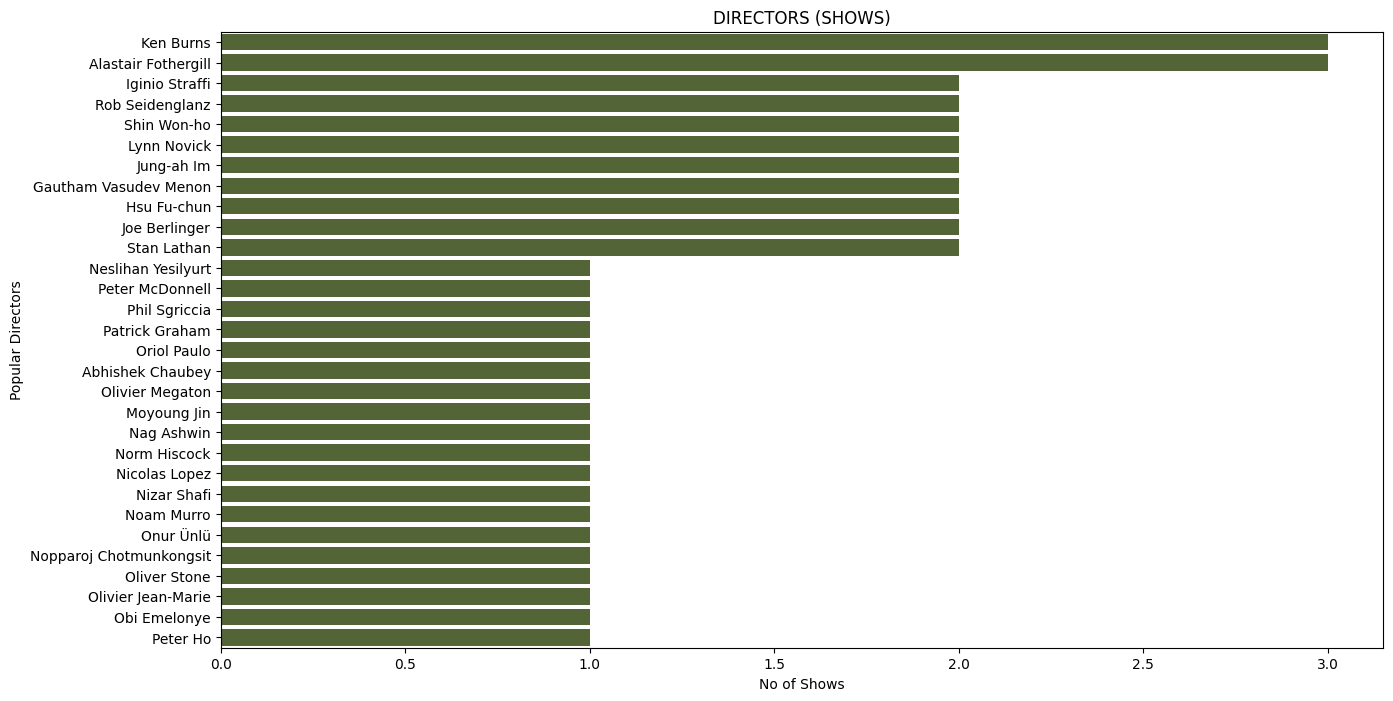

In [110]:
nd2_shows_directors = nd2_shows.groupby(["Directors"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:31]
nd2_shows_directors = nd2_shows_directors[nd2_shows_directors["Directors"]!= "Unknown Directors"]
plt.figure(figsize=(15,8))
sns.barplot(nd2_shows_directors, x = "title", y = "Directors", color = "darkolivegreen", order =nd2_shows_directors.sort_values(by = "title", ascending = False).Directors)
plt.xlabel("No of Shows")
plt.ylabel("Popular Directors")
plt.title("DIRECTORS (SHOWS)")
plt.show()

Ken Burns, Alastair Fothergill, Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix

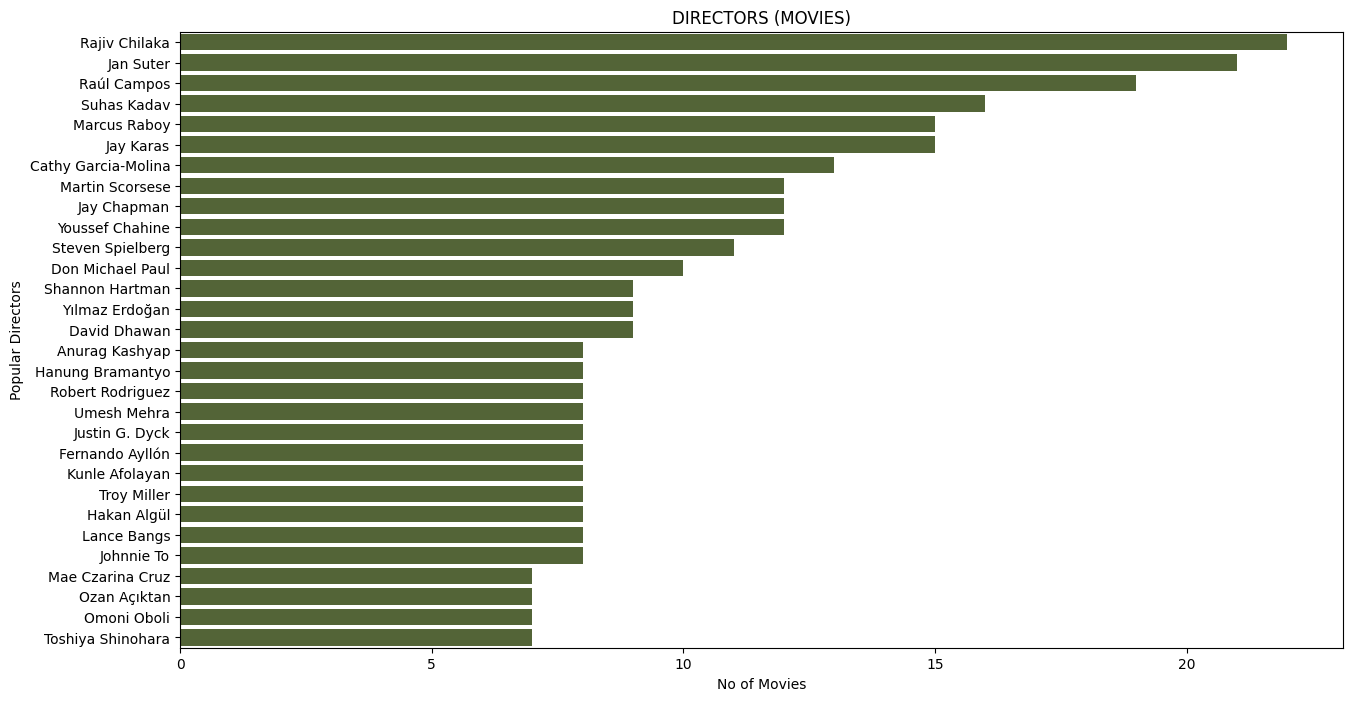

In [111]:
nd2_Movies_directors = nd2_Movies.groupby(["Directors"]).agg({"title":"nunique"}).reset_index().sort_values(by = "title", ascending = False)[:31]
nd2_Movies_directors = nd2_Movies_directors[nd2_Movies_directors["Directors"]!= "Unknown Directors"]
plt.figure(figsize=(15,8))
sns.barplot(nd2_Movies_directors, x = "title", y = "Directors", color = "darkolivegreen", order =nd2_Movies_directors.sort_values(by = "title", ascending = False).Directors)
plt.xlabel("No of Movies")
plt.ylabel("Popular Directors")
plt.title("DIRECTORS (MOVIES)")
plt.show()

Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies

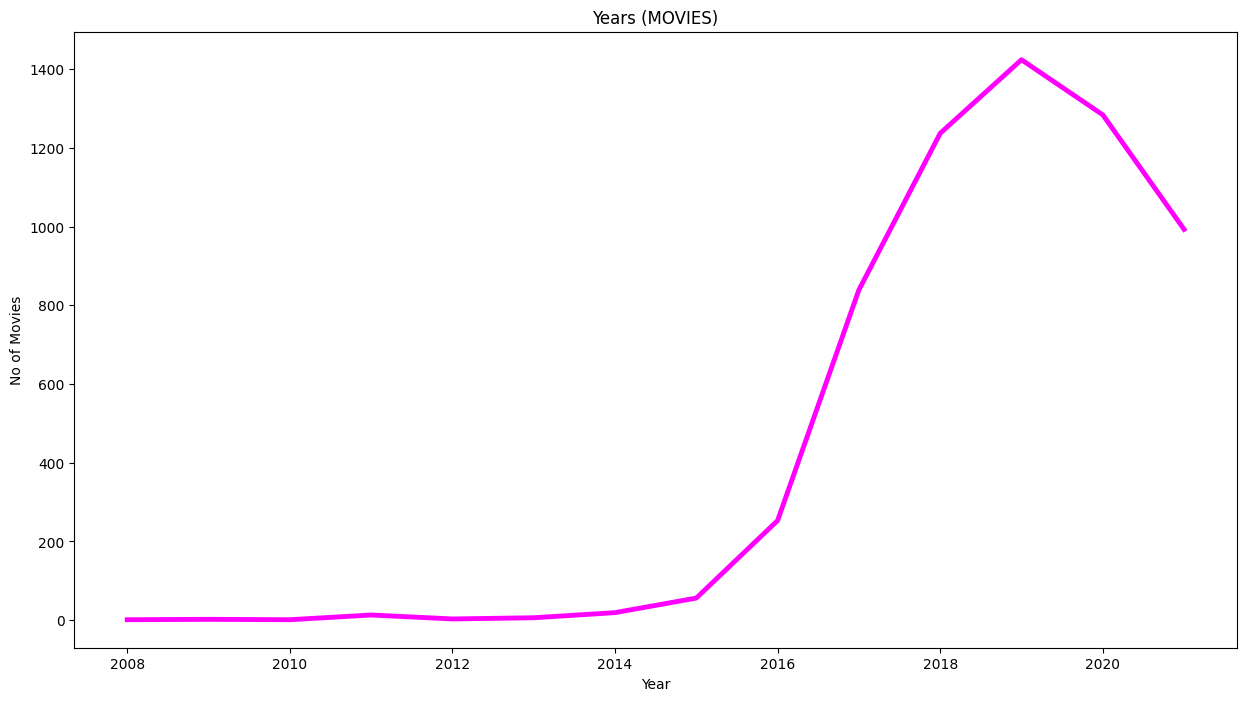

In [112]:
nd2_years = nd2_Movies.groupby(["Year"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(nd2_years, x = "Year", y = "title", color = "magenta",linewidth= 3.5)
plt.xlabel("Year")
plt.ylabel("No of Movies")
plt.title("Years (MOVIES)")
plt.show()

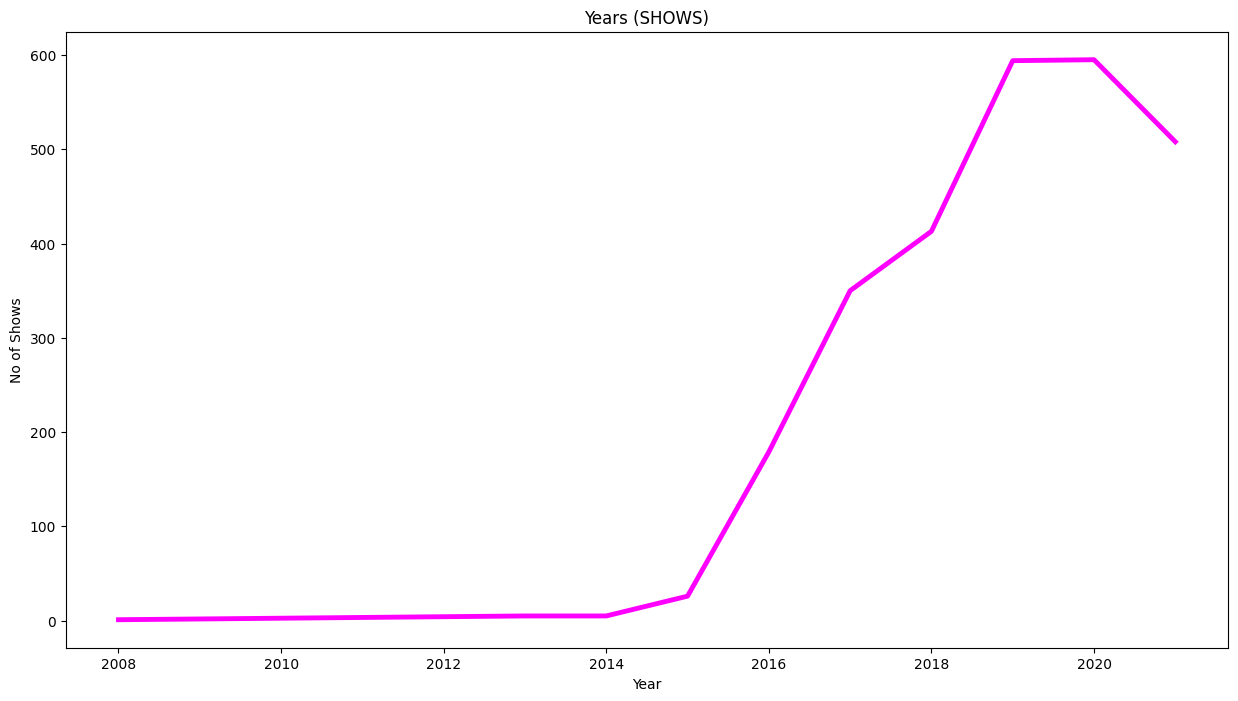

In [113]:
nd2_years = nd2_shows.groupby(["Year"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(nd2_years, x = "Year", y = "title", color = "magenta",linewidth= 3.5)
plt.xlabel("Year")
plt.ylabel("No of Shows")
plt.title("Years (SHOWS)")
plt.show()

Till 2019, overall content across Netflix was increasing but due to Covid in 2020, though TV Shows didn't take a hit then Movies did take a hit. Well later in 2021, content across both was reduced significantly

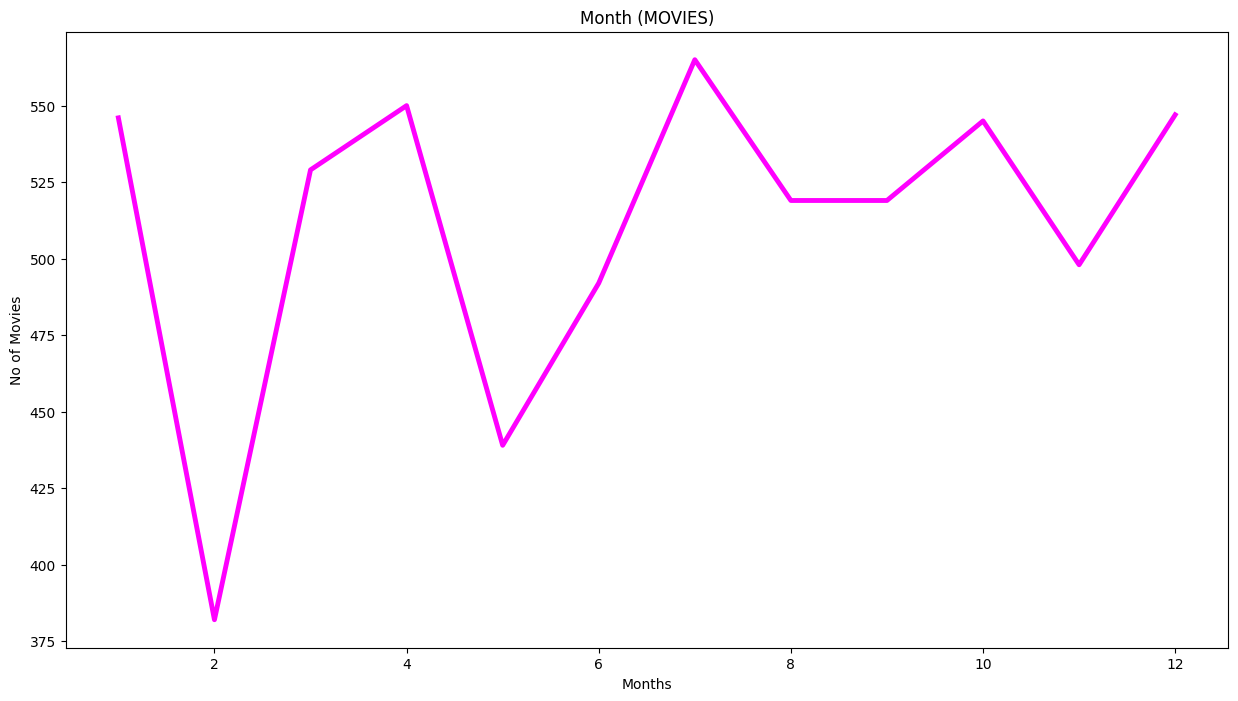

In [114]:
nd2_months = nd2_Movies.groupby(["Months_added"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(nd2_months, x = "Months_added", y = "title", color ="magenta",linewidth= 3.5)
plt.xlabel("Months")
plt.ylabel("No of Movies")
plt.title("Month (MOVIES)")
plt.show()

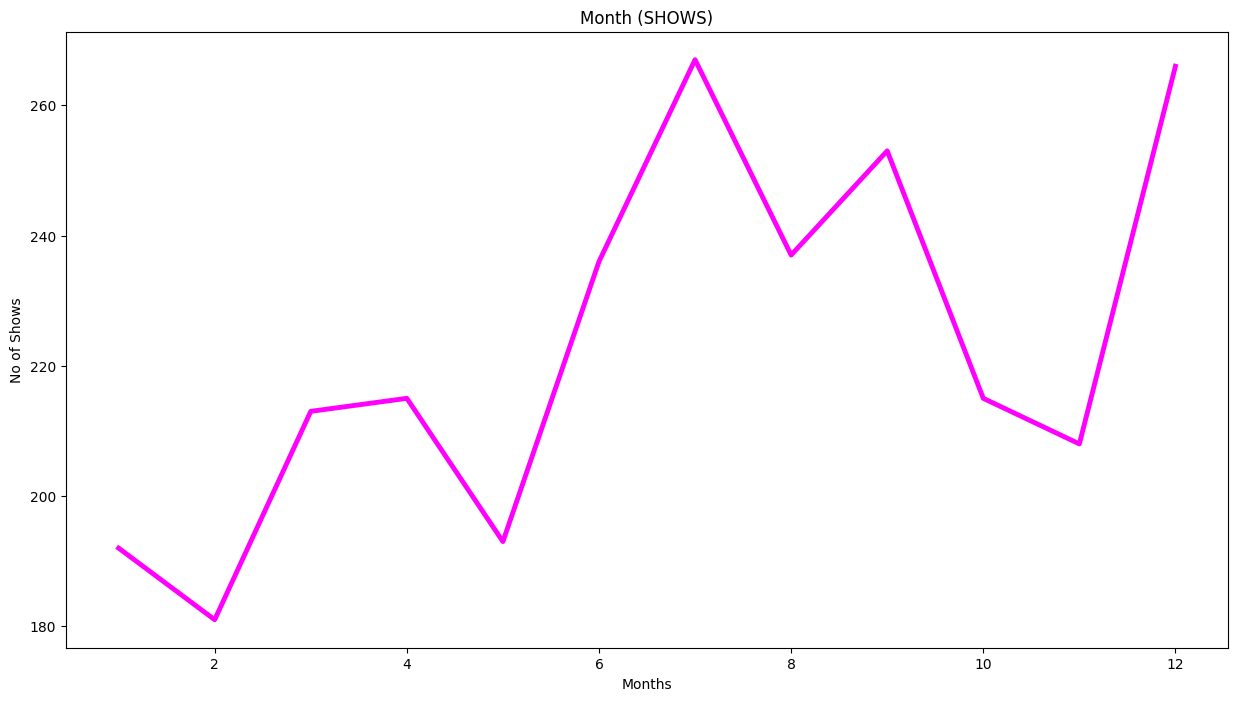

In [115]:
nd2_months = nd2_shows.groupby(["Months_added"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(nd2_months, x = "Months_added", y = "title", color ="magenta",linewidth= 3.5)
plt.xlabel("Months")
plt.ylabel("No of Shows")
plt.title("Month (SHOWS)")
plt.show()

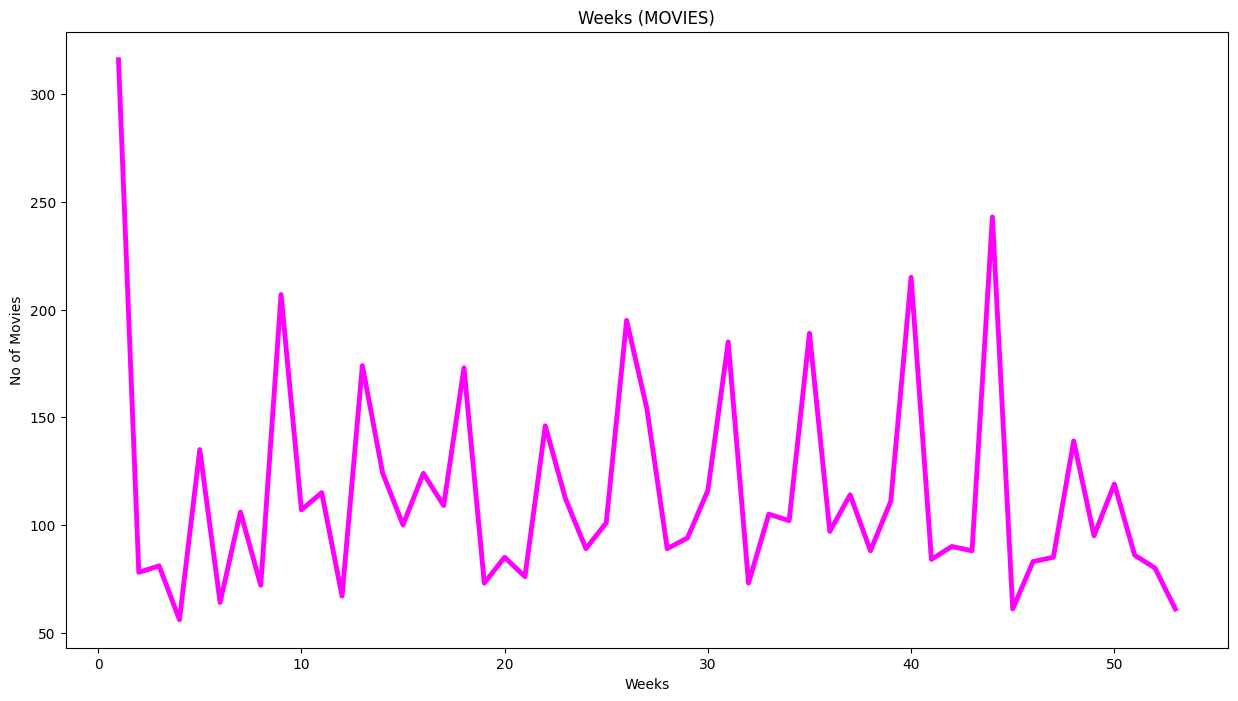

In [116]:
nd2_Weeks = nd2_Movies.groupby(["Weeks_added"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(nd2_Weeks, x = "Weeks_added", y = "title", color = "magenta",linewidth= 3.5)
plt.xlabel("Weeks")
plt.ylabel("No of Movies")
plt.title("Weeks (MOVIES)")
plt.show()

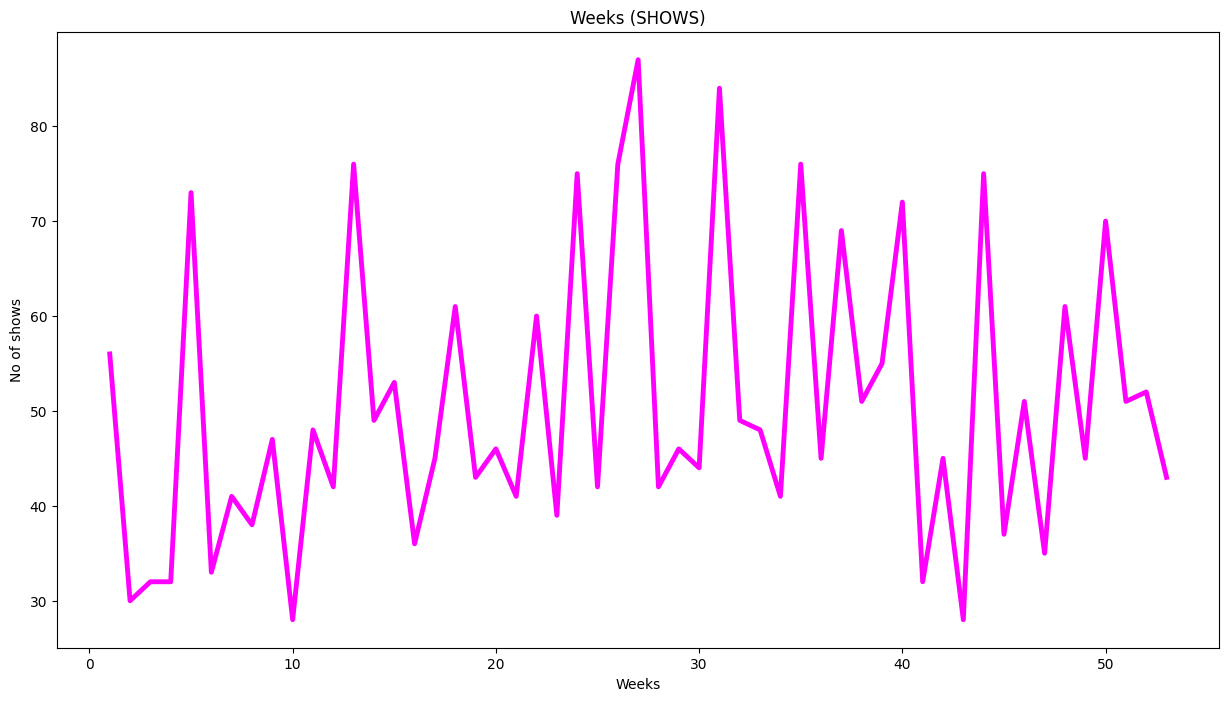

In [117]:
nd2_Weeks = nd2_shows.groupby(["Weeks_added"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(nd2_Weeks, x = "Weeks_added", y = "title", color = "magenta",linewidth= 3.5)
plt.xlabel("Weeks")
plt.ylabel("No of shows")
plt.title("Weeks (SHOWS)")
plt.show()

TV Shows are added in Netflix by a tremendous amount in mid weeks/months of the year, i.e- July

Movies are added in Netflix by a tremendous amount in first week/last month of current year and first month of next year

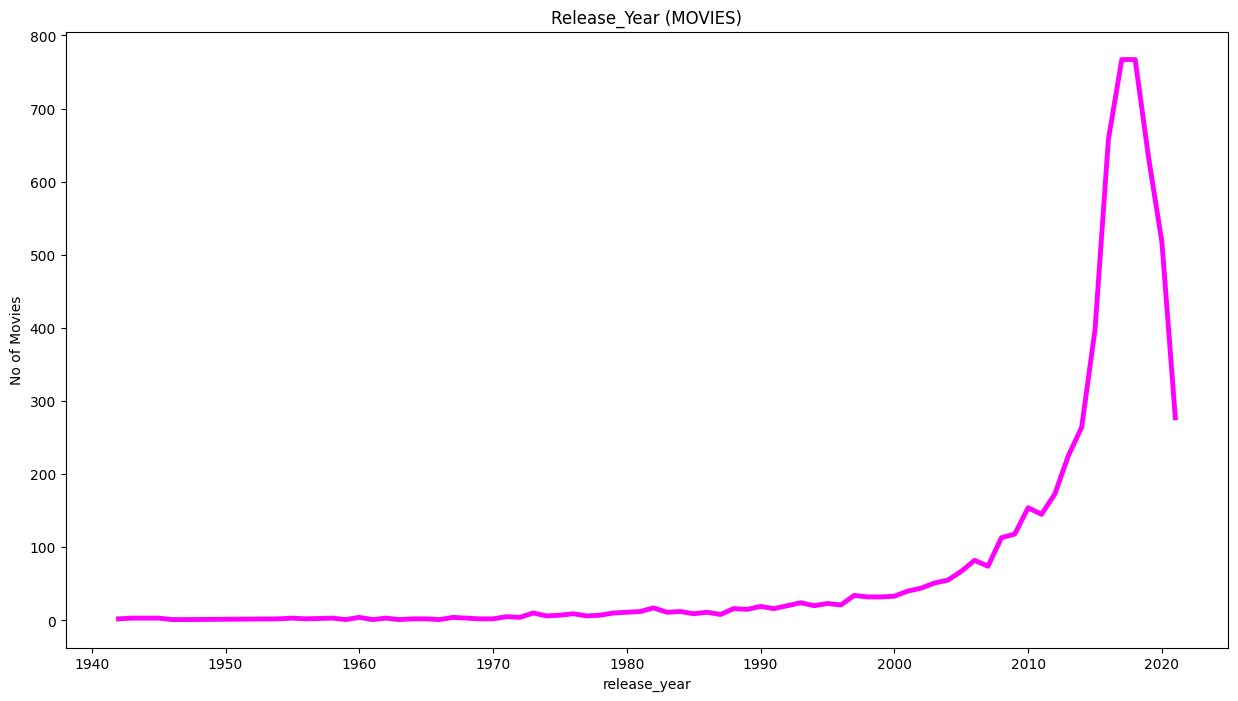

In [118]:
nd2_release_year = nd2_Movies.groupby(["release_year"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(nd2_release_year, x = "release_year", y = "title", color = "magenta",linewidth= 3.5)
plt.xlabel("release_year")
plt.ylabel("No of Movies")
plt.title("Release_Year (MOVIES)")
plt.show()

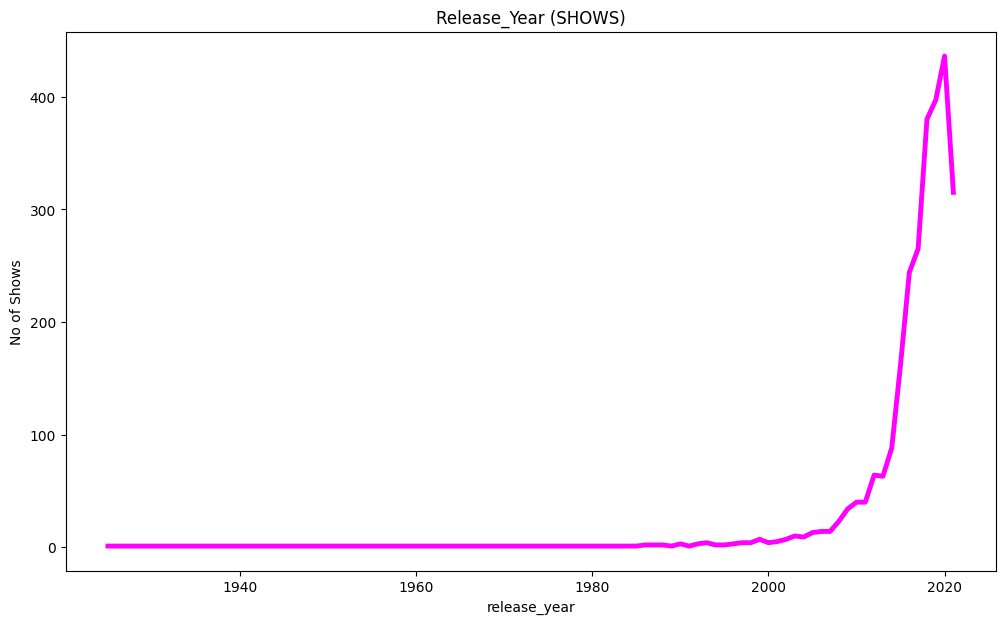

In [119]:
nd2_release_year = nd2_shows.groupby(["release_year"]).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(12,7))
sns.lineplot(nd2_release_year, x = "release_year", y = "title", color = "magenta",linewidth= 3.5)
plt.xlabel("release_year")
plt.ylabel("No of Shows")
plt.title("Release_Year (SHOWS)")
plt.show()

Actual Releases of both TV Shows and Movies have taken a hit after 2020

In [120]:
nd2["diff"] = nd2["Year"] - nd2["release_year"]

in the dataset we didn't have movies and shows release day and month details. so i take mode of movies/shows date added month. to find the best time to added netflix

In [121]:
nd2["Months_added"].mode()

0    7
Name: Months_added, dtype: int32

In [122]:
nd2.head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description,modified_date,Weeks_added,Months_added,Year,diff
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,Documentaries,United States,s1,Movie,"September 25, 2021",PG-13,80-100,2020,"As her father nears the end of his life, filmm...",2021-09-25,38,9,2021,1
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021,0
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021,0
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021,0
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",TV-MA,2 Seasons,2021,"After crossing paths at a party, a Cape Town t...",2021-09-24,38,9,2021,0


In [123]:
nd2_shows["Months_added"].mode()

0    12
Name: Months_added, dtype: int32

December month is better time to add shows in Netflix

In [124]:
nd2_Movies["Months_added"].mode()

0    7
Name: Months_added, dtype: int32

July month is better time to add Movies in Netflix

In [125]:
japan = nd2_shows[nd2_shows["Countrys"]=="Japan"]
japan.head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description,modified_date,Weeks_added,Months_added,Year
1754,Yowamushi Pedal,Unknown Directors,Daiki Yamashita,Anime Series,Japan,s77,TV Show,"September 14, 2021",TV-14,1 Season,2013,"A timid, anime-loving teen gets drawn into a s...",2021-09-14,37,9,2021
1755,Yowamushi Pedal,Unknown Directors,Daiki Yamashita,International TV Shows,Japan,s77,TV Show,"September 14, 2021",TV-14,1 Season,2013,"A timid, anime-loving teen gets drawn into a s...",2021-09-14,37,9,2021
1756,Yowamushi Pedal,Unknown Directors,Kohsuke Toriumi,Anime Series,Japan,s77,TV Show,"September 14, 2021",TV-14,1 Season,2013,"A timid, anime-loving teen gets drawn into a s...",2021-09-14,37,9,2021
1757,Yowamushi Pedal,Unknown Directors,Kohsuke Toriumi,International TV Shows,Japan,s77,TV Show,"September 14, 2021",TV-14,1 Season,2013,"A timid, anime-loving teen gets drawn into a s...",2021-09-14,37,9,2021
1758,Yowamushi Pedal,Unknown Directors,Jun Fukushima,Anime Series,Japan,s77,TV Show,"September 14, 2021",TV-14,1 Season,2013,"A timid, anime-loving teen gets drawn into a s...",2021-09-14,37,9,2021


checking japanese are mostly watched anime?

In [126]:
japan.groupby(["Genre"]).agg({"title": "nunique"}).sort_values(by = "title", ascending = False)

,title
Genre,
International TV Shows,151
Anime Series,143
Kids' TV,29
Romantic TV Shows,21
TV Dramas,21
Crime TV Shows,16
Teen TV Shows,14
TV Comedies,10
Reality TV,9


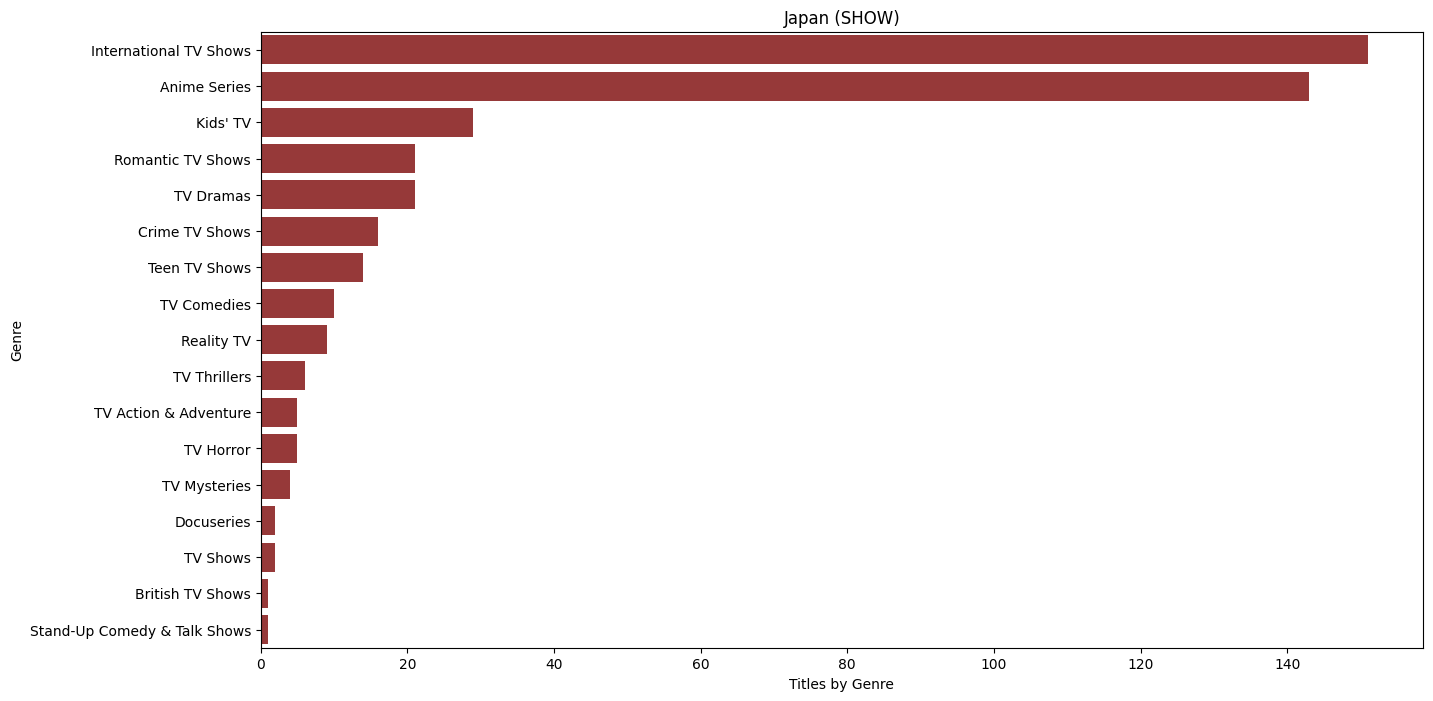

In [127]:
nd2_shows_japan_Country = japan.groupby(["Genre"]).agg({"title": "nunique"}).reset_index().sort_values(by = "title", ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(nd2_shows_japan_Country, x = "title" , y = "Genre", color = "brown",order = nd2_shows_japan_Country.sort_values("title", ascending = False).Genre)
plt.xlabel("Titles by Genre")
plt.ylabel("Genre")
plt.title("Japan (SHOW)")
plt.show()



anime series are most popular Genre in japan

In [128]:
korean = nd2_shows[nd2_shows["Countrys"]=="South Korea"]
korean.head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description,modified_date,Weeks_added,Months_added,Year
2318,Tayo the Little Bus,Unknown Directors,Robyn Slade,Kids' TV,South Korea,s105,TV Show,"September 6, 2021",TV-Y,2 Seasons,2016,As they learn their routes around the busy cit...,2021-09-06,36,9,2021
2319,Tayo the Little Bus,Unknown Directors,Robyn Slade,Korean TV Shows,South Korea,s105,TV Show,"September 6, 2021",TV-Y,2 Seasons,2016,As they learn their routes around the busy cit...,2021-09-06,36,9,2021
2320,Tayo the Little Bus,Unknown Directors,Kami Desilets,Kids' TV,South Korea,s105,TV Show,"September 6, 2021",TV-Y,2 Seasons,2016,As they learn their routes around the busy cit...,2021-09-06,36,9,2021
2321,Tayo the Little Bus,Unknown Directors,Kami Desilets,Korean TV Shows,South Korea,s105,TV Show,"September 6, 2021",TV-Y,2 Seasons,2016,As they learn their routes around the busy cit...,2021-09-06,36,9,2021
2714,Pororo - The Little Penguin,Unknown Directors,Unknown Actors,Kids' TV,South Korea,s125,TV Show,"September 2, 2021",TV-Y7,3 Seasons,2013,"On a tiny island, Pororo the penguin has fun a...",2021-09-02,35,9,2021


checking koreans are mostly watching romantic tv shows?

In [129]:
korean.groupby(["Genre"]).agg({"title": "nunique"}).sort_values(by = "title", ascending = False)

,title
Genre,
International TV Shows,153
Korean TV Shows,132
Romantic TV Shows,78
TV Dramas,38
Crime TV Shows,24
TV Comedies,20
Kids' TV,16
TV Action & Adventure,9
Reality TV,4


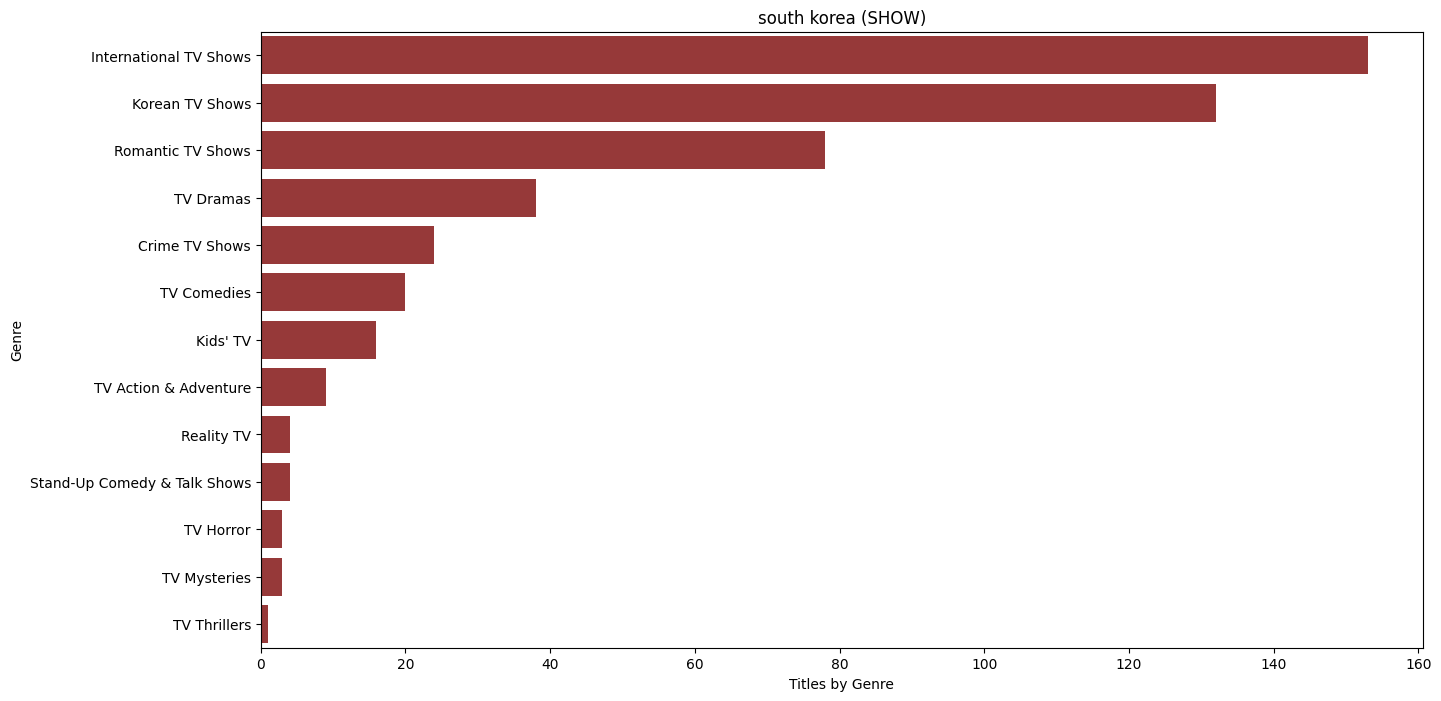

In [130]:
nd2_shows_korea_Country = korean.groupby(["Genre"]).agg({"title": "nunique"}).reset_index().sort_values(by = "title", ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(nd2_shows_korea_Country, x = "title" , y = "Genre", color = "brown",order = nd2_shows_korea_Country.sort_values("title", ascending = False).Genre)
plt.xlabel("Titles by Genre")
plt.ylabel("Genre")
plt.title("south korea (SHOW)")
plt.show()

south korea are mostly watching romantic tv shows compare to other countrys.

USA is the most number of releasing shows in netflix so deep analysis it

In [131]:
usa = nd2_shows[nd2_shows["Countrys"]=="United States"]
usa.head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description,modified_date,Weeks_added,Months_added,Year
85,Jailbirds New Orleans,Unknown Directors,Unknown Actors,Docuseries,United States,s4,TV Show,"September 24, 2021",TV-MA,1 Season,2021,"Feuds, flirtations and toilet talk go down amo...",2021-09-24,38,9,2021
86,Jailbirds New Orleans,Unknown Directors,Unknown Actors,Reality TV,United States,s4,TV Show,"September 24, 2021",TV-MA,1 Season,2021,"Feuds, flirtations and toilet talk go down amo...",2021-09-24,38,9,2021
111,Midnight Mass,Mike Flanagan,Kate Siegel,TV Dramas,United States,s6,TV Show,"September 24, 2021",TV-MA,1 Season,2021,The arrival of a charismatic young priest brin...,2021-09-24,38,9,2021
112,Midnight Mass,Mike Flanagan,Kate Siegel,TV Horror,United States,s6,TV Show,"September 24, 2021",TV-MA,1 Season,2021,The arrival of a charismatic young priest brin...,2021-09-24,38,9,2021
113,Midnight Mass,Mike Flanagan,Kate Siegel,TV Mysteries,United States,s6,TV Show,"September 24, 2021",TV-MA,1 Season,2021,The arrival of a charismatic young priest brin...,2021-09-24,38,9,2021


In [132]:
usa.groupby(["Genre"]).agg({"title": "nunique"}).sort_values(by = "title", ascending = False)

,title
Genre,
TV Comedies,330
TV Dramas,328
Kids' TV,294
International TV Shows,281
Docuseries,255
Crime TV Shows,188
Reality TV,173
Romantic TV Shows,109
TV Action & Adventure,106


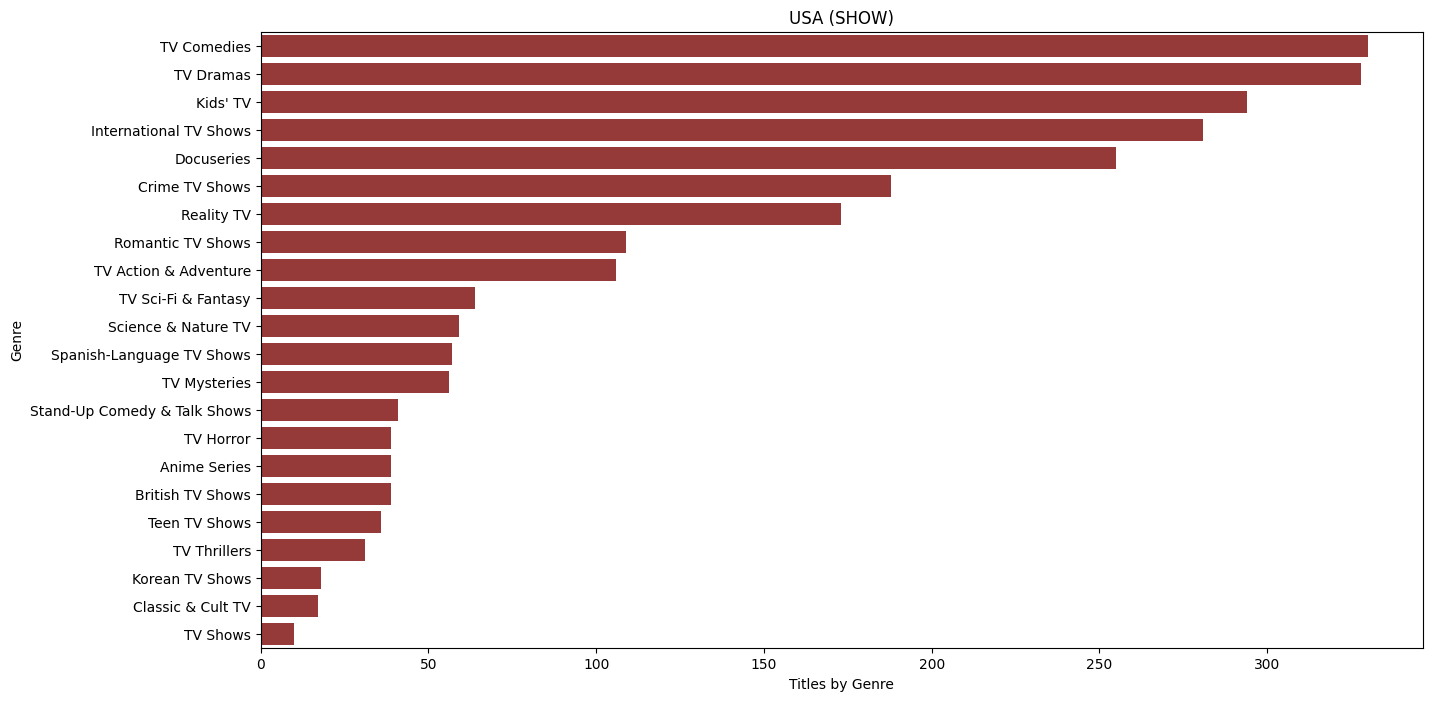

In [133]:
nd2_shows_usa_Country = usa.groupby(["Genre"]).agg({"title": "nunique"}).reset_index().sort_values(by = "title", ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(nd2_shows_usa_Country, x = "title" , y = "Genre", color = "brown",order = nd2_shows_usa_Country.sort_values("title", ascending = False).Genre)
plt.xlabel("Titles by Genre")
plt.ylabel("Genre")
plt.title("USA (SHOW)")
plt.show()

TV Comedies, TV Dramas,Kids's Tv most Watching Genre in USA shows

UK is the second most number of releasing shows in netflix so deep analysis it

In [134]:
uk= nd2_shows[nd2_shows["Countrys"]=="United Kingdom"]
uk.head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description,modified_date,Weeks_added,Months_added,Year
323,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,British TV Shows,United Kingdom,s9,TV Show,"September 24, 2021",TV-14,9 Seasons,2021,A talented batch of amateur bakers face off in...,2021-09-24,38,9,2021
324,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,Reality TV,United Kingdom,s9,TV Show,"September 24, 2021",TV-14,9 Seasons,2021,A talented batch of amateur bakers face off in...,2021-09-24,38,9,2021
325,The Great British Baking Show,Andy Devonshire,Sue Perkins,British TV Shows,United Kingdom,s9,TV Show,"September 24, 2021",TV-14,9 Seasons,2021,A talented batch of amateur bakers face off in...,2021-09-24,38,9,2021
326,The Great British Baking Show,Andy Devonshire,Sue Perkins,Reality TV,United Kingdom,s9,TV Show,"September 24, 2021",TV-14,9 Seasons,2021,A talented batch of amateur bakers face off in...,2021-09-24,38,9,2021
327,The Great British Baking Show,Andy Devonshire,Mary Berry,British TV Shows,United Kingdom,s9,TV Show,"September 24, 2021",TV-14,9 Seasons,2021,A talented batch of amateur bakers face off in...,2021-09-24,38,9,2021


In [135]:
uk.groupby(["Genre"]).agg({"title": "nunique"}).sort_values(by = "title", ascending = False)

,title
Genre,
British TV Shows,226
International TV Shows,128
Docuseries,90
Crime TV Shows,49
TV Comedies,44
Kids' TV,43
TV Dramas,36
Reality TV,35
Science & Nature TV,27


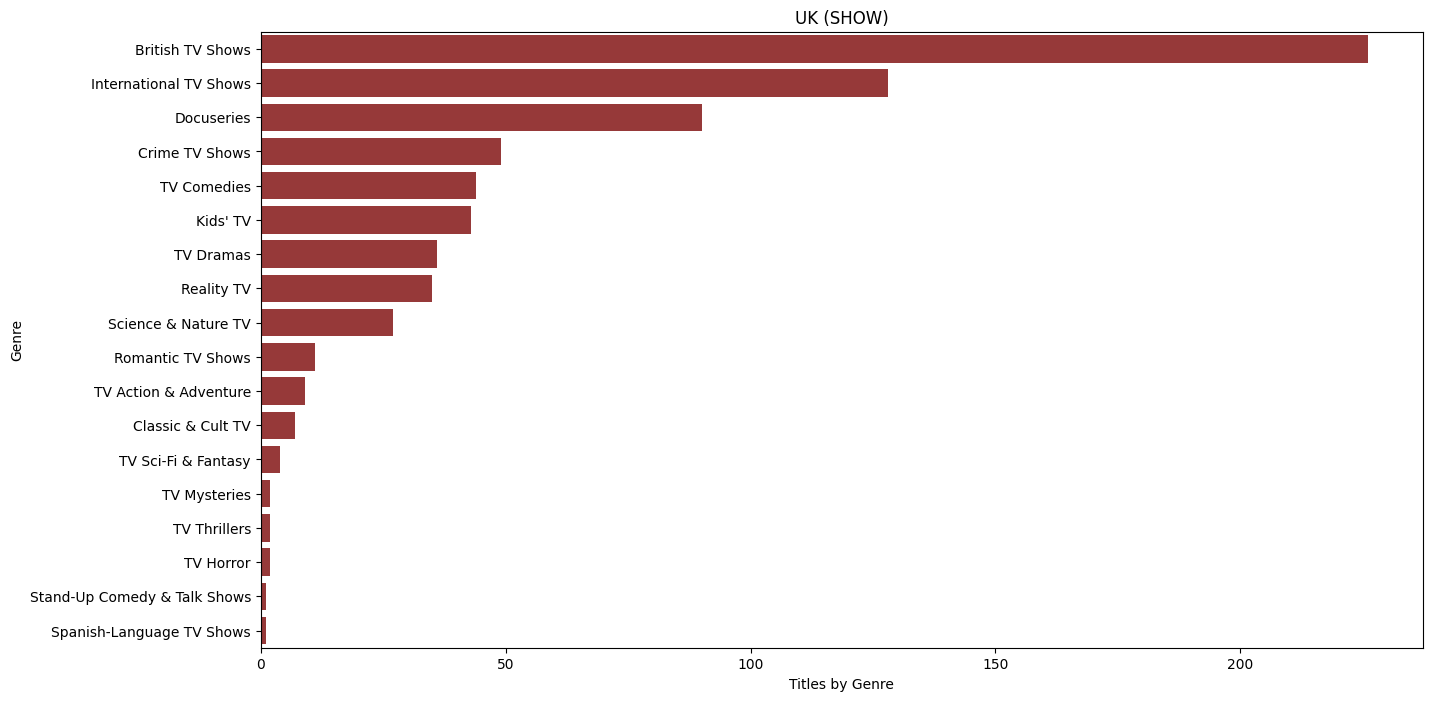

In [136]:
nd2_shows_uk_Country = uk.groupby(["Genre"]).agg({"title": "nunique"}).reset_index().sort_values(by = "title", ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(nd2_shows_uk_Country, x = "title" , y = "Genre", color = "brown",order = nd2_shows_uk_Country.sort_values("title", ascending = False).Genre)
plt.xlabel("Titles by Genre")
plt.ylabel("Genre")
plt.title("UK (SHOW)")
plt.show()

in UK, British TV shows, International tv shows and Docuseries are mostly watching genre in netflix

in india moies are more popular then shows.

In [137]:
india = nd2_Movies[nd2_Movies["Countrys"]=="India"]
india.head()

,title,Directors,Actors,Genre,Countrys,show_id,type,date_added,rating,duration,release_year,description,modified_date,Weeks_added,Months_added,Year
621,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,Comedies,India,s23,Movie,"September 21, 2021",TV-PG,150-200,1996,Newly divorced and denied visitation rights wi...,2021-09-21,38,9,2021
622,Avvai Shanmughi,K.S. Ravikumar,Kamal Hassan,International Movies,India,s23,Movie,"September 21, 2021",TV-PG,150-200,1996,Newly divorced and denied visitation rights wi...,2021-09-21,38,9,2021
629,Avvai Shanmughi,K.S. Ravikumar,Nassar,Comedies,India,s23,Movie,"September 21, 2021",TV-PG,150-200,1996,Newly divorced and denied visitation rights wi...,2021-09-21,38,9,2021
630,Avvai Shanmughi,K.S. Ravikumar,Nassar,International Movies,India,s23,Movie,"September 21, 2021",TV-PG,150-200,1996,Newly divorced and denied visitation rights wi...,2021-09-21,38,9,2021
631,Avvai Shanmughi,K.S. Ravikumar,S.P. Balasubrahmanyam,Comedies,India,s23,Movie,"September 21, 2021",TV-PG,150-200,1996,Newly divorced and denied visitation rights wi...,2021-09-21,38,9,2021


In [138]:
india.groupby(["Genre"]).agg({"title": "nunique"}).sort_values(by = "title", ascending = False)

,title
Genre,
International Movies,902
Dramas,687
Comedies,343
Independent Movies,170
Action & Adventure,149
Romantic Movies,122
Music & Musicals,105
Thrillers,103
Children & Family Movies,74


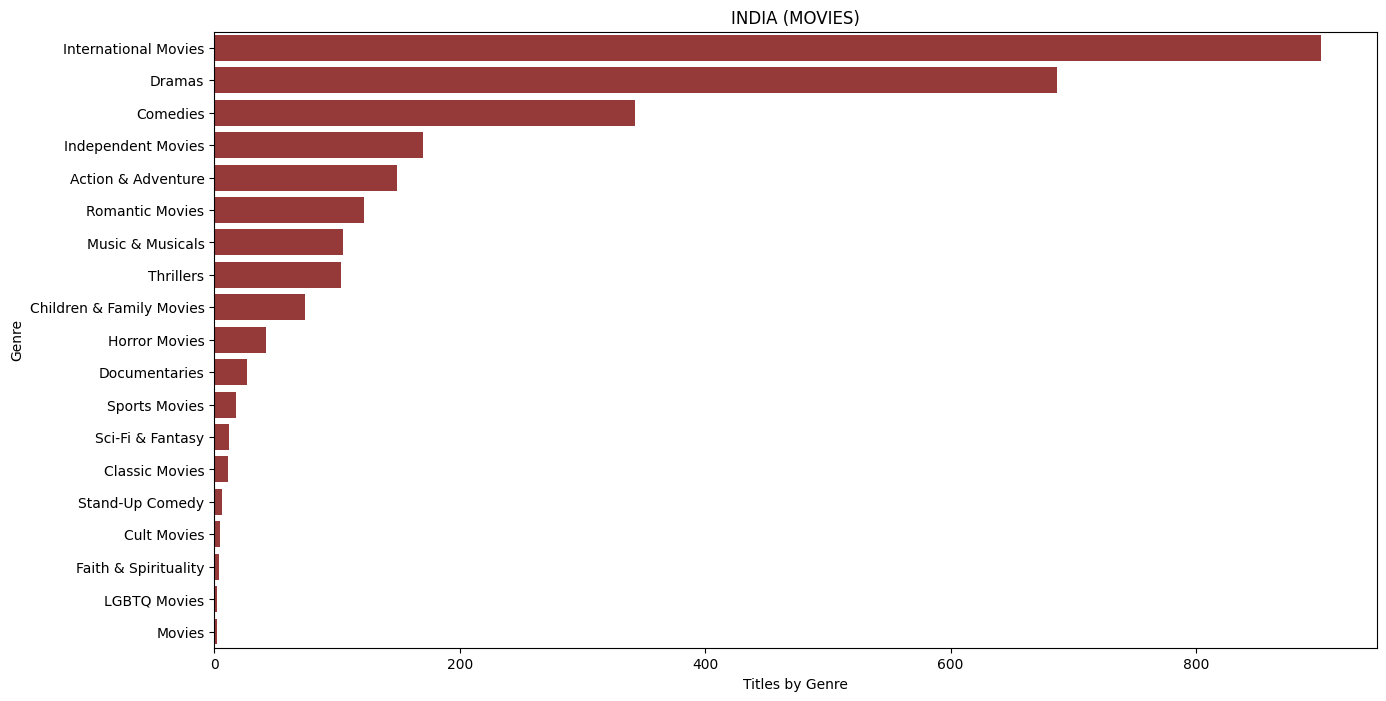

In [139]:
nd2_movies_india_Country = india.groupby(["Genre"]).agg({"title": "nunique"}).reset_index().sort_values(by = "title", ascending = False)
plt.figure(figsize = (15,8))
sns.barplot(nd2_movies_india_Country, x = "title" , y = "Genre", color = "brown",order = nd2_movies_india_Country.sort_values("title", ascending = False).Genre)
plt.xlabel("Titles by Genre")
plt.ylabel("Genre")
plt.title("INDIA (MOVIES)")
plt.show()

in india International Movies, Dramas, comedies are most watching Genre in netflix movies

Recommendations

1) The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, 
    so content  aligning to that is recommended.

2) Add TV Shows in July/August and Movies in last week of the year/first month of the next year.

3) For Netflix audience 80-150 mins is the recommended length for movies. 

4) Netflix audience season1 to season 3 is recommended length for shows.

5) for tv shows south Korean/Japanese actors are recommendemovies for tv shows south Indian actors are recommended.

7) The target audience recommended to be completely Mature audiences content and unsuitable for children under 14 years of age most in shows/Movies.

8) Anime Genre for Japan and Romantic Genre in TV Shows for South Korean audiences is recommended.

9) While creating content, take into consideration the popular actors/directors for that country.
    Also take into account the director-actor combination which is

10) in india movies are more popular then shows. shows are now only booming.

11) in UK, British TV shows are most watcing Genre in netflix shows

12) in USA TV Comedies are most watching Genre in netflix shows highly recommended.ghly recommended.